# Introduction
This notebook serves as a comprehensive learning module that combines hands-on coding, conceptual insights, and structured student tasks. The flow mirrors a real deep learning workflow—from loading data and building models to understanding optimization, regularization, and model behavior.

The notebook is organized into **three major sections**, each designed to progressively deepen the learner's understanding of neural networks and training dynamics.


## Section 1 — Practical Part #1: Building & Training a Neural Network

### **What this section covers:**
- Loading and preprocessing the MNIST dataset
- Flattening image data for fully connected networks
- Building a neural network with:
  - Input layer (Flatten)
  - Hidden Dense layer (ReLU activation)
  - Output layer (Softmax activation)
- Compiling the model using the **Adam optimizer**
- Training the model and monitoring training/validation loss
- Predicting and visualizing test samples

### **Learning Outcome:**
Students gain a practical understanding of how forward and backward passes operate within a simple neural network.

[mnist dataset Link](https://datasets.activeloop.ai/docs/ml/datasets/mnist/)
---


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train ,  x_test = x_train / 255.0 , x_test/255.0

In [ ]:
len(x_train)

60000

In [ ]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

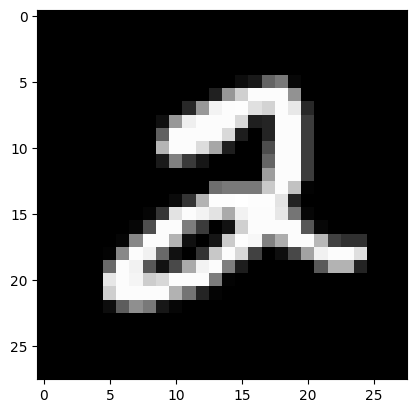

In [ ]:
plt.imshow(x_train[5], cmap = "gray")

In [ ]:
model= keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), # input layer > 2D to 1D
  # 64 128 256
  keras.layers.Dense(128, activation="relu"), # hidden layer 1

  keras.layers.Dense(10, activation= "softmax" ) # output layer
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# adam Adaptive Moment Estimation (RMSporb+ Momenmtum) > Optimizer
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train test

train validation test

In [ ]:
history = model.fit(x_train,y_train ,epochs = 5 ,validation_data=(x_test, y_test) ) # train ,  test

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8817 - loss: 0.4267 - val_accuracy: 0.9575 - val_loss: 0.1427
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9631 - loss: 0.1243 - val_accuracy: 0.9698 - val_loss: 0.0986
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9773 - loss: 0.0772 - val_accuracy: 0.9737 - val_loss: 0.0811
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9834 - loss: 0.0559 - val_accuracy: 0.9739 - val_loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9867 - loss: 0.0444 - val_accuracy: 0.9763 - val_loss: 0.0760


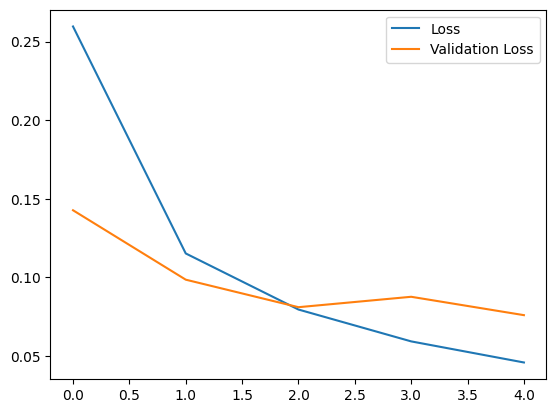

In [ ]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

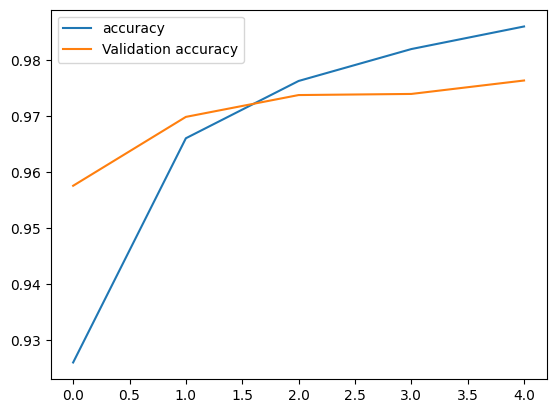

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(x_test[14].reshape(1, 28, 28))  # 10 pred
print("Prediction:", np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Prediction: 1


In [ ]:
prediction

array([[1.15802590e-09, 9.99981284e-01, 2.70168641e-07, 4.80004201e-06,
        2.93351718e-07, 1.32206557e-09, 1.19954011e-08, 4.36961443e-07,
        1.26257955e-05, 2.60396121e-07]], dtype=float32)

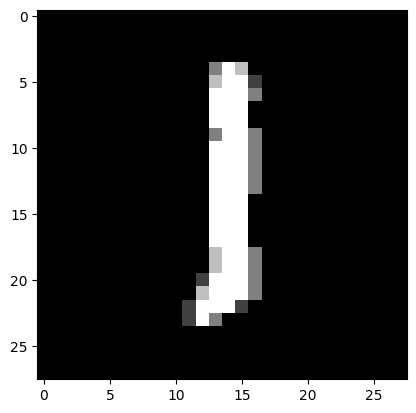

In [ ]:
plt.imshow(x_test[14], cmap = "gray")

## Section 2 — Practical Part #2: Data Splitting, Regularization & Early Stopping

### **Key Concepts Introduced:**
#### **1. Proper Dataset Splitting**
**General Idea**

- **Training set**: The model learns from this data.  
- **Validation set**: Used during training to tune hyperparameters and prevent overfitting.  
- **Test set**: Kept aside until the very end to measure the model’s *true performance* on completely unseen data.  

**Important Note**:  
If you use `x_test` directly as your validation set, this is a mistake.  
Why? Because you will end up tuning your model on the same data that you later claim to be your “unseen test set,” which makes the final evaluation biased.  

The correct workflow:
1. Split the dataset into **train + test** (e.g., 80% train, 20% test).  
2. From the **train** portion, further split into **train + validation** (e.g., 70% train, 10% validation, 20% test).  
3. Use the **validation set** only for model tuning.  
4. Use the **test set** once at the end for the final unbiased performance check.

#### **2. Regularization Techniques**
- Adding **Dropout** layers to reduce overfitting
- Using **EarlyStopping** to detect convergence and stop training

#### **3. Improved Model Pipeline**
- Training over more epochs
- Monitoring training vs. validation performance
- Evaluating on the final test set
- Predicting and analyzing results

### **Learning Outcome:**
Students understand how model generalization is improved using splitting, dropout, and early stopping.

---


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1) Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 -> 0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 2) Split Validation Set from Training Set
# Reserve last 5000 samples for validation
x_val = x_train[-5000:]
y_val = y_train[-5000:]

x_tr = x_train[:-5000]
y_tr = y_train[:-5000]
print("Train shape:", x_tr.shape)
print("Validation shape:", x_val.shape)
print("Test shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (55000, 28, 28)
Validation shape: (5000, 28, 28)
Test shape: (10000, 28, 28)


In [ ]:

# 3) Build Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),   # prevent overfitting
    keras.layers.Dense(10, activation="softmax")
])

# 4) Compile Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

# 5) Train with Validation Set
callbacks = [
    keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8610 - loss: 0.4797 - val_accuracy: 0.9640 - val_loss: 0.1279
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9562 - loss: 0.1429 - val_accuracy: 0.9768 - val_loss: 0.0839
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9707 - loss: 0.0970 - val_accuracy: 0.9794 - val_loss: 0.0753
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9779 - loss: 0.0722 - val_accuracy: 0.9786 - val_loss: 0.0751
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9807 - loss: 0.0603 - val_accuracy: 0.9816 - val_loss: 0.0656
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9853 - loss: 0.0471 - val_accuracy: 0.9810 - val_loss: 0.0688
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9871 - loss: 0.0396 - val_accuracy: 0.9796 - val_loss: 0.0694
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9885 - loss: 0.0357 

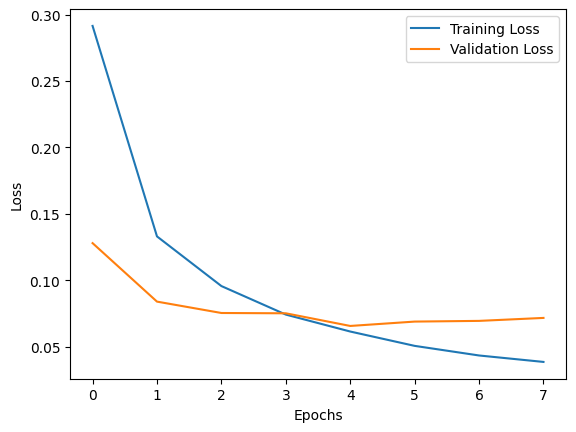

In [ ]:

# 6) Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# 7) Evaluate on Test Set
print("Final evaluation on test data:")
model.evaluate(x_test, y_test)

Final evaluation on test data:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0887


[0.07395050674676895, 0.9781000018119812]

In [ ]:
# 8) Predict Example
sample = x_test[13].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[13])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted Label: 0
True Label: 0


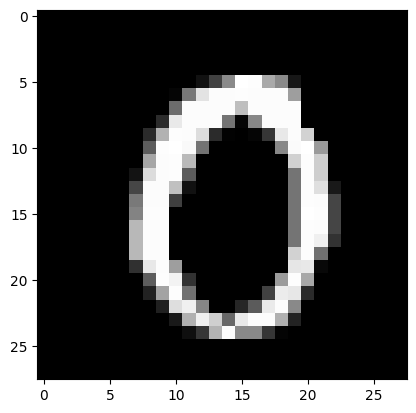

In [ ]:
plt.imshow(x_test[13], cmap="gray")
plt.show()

## Section 3 — Student Tasks: Deep Learning Mastery

This section turns theory and practice into structured exploration. Students investigate predictions, optimization behavior, regularization strength, and architectural effects.
### **Task Categories:**

#### **1. Prediction Behavior & Analysis**
- Explain correct and incorrect predictions
- Connect outputs to internal neural network operations

#### **2. Training Dynamics & Loss Curves**
- Compare different epoch lengths
- Interpret overfitting and underfitting signals

#### **3. Regularization Experiments**
- Dropout ablation (0%, 10%, 30%)
- L2 weight decay tuning
- EarlyStopping behavior interpretation

#### **4. Optimizer Comparison**
- SGD
- SGD with Momentum
- Adam
- AdamW
Students analyze convergence speed, stability, and gradients.

#### **5. Architecture & Activation Function Variants**
- Replace ReLU with Tanh, Softsign, or GELU
- Discuss gradient flow differences
- Explain why ReLU dominates MLPs and why GELU is favored in Transformers

#### **6. Weight Inspection & Model Capacity**
- Examine dense layer weights
- Connect parameter count to overfitting risk
- Explain how regularization mitigates capacity issues


---

## Part 1 — Core Model Understanding & Prediction Behavior

### **Task 1 — Deep Prediction Analysis**
Select **three samples** from `x_test` and:

1. Run `model.predict(...)` on each sample.  
2. Print the **Predicted Label** and **True Label**.  
3. Provide a conceptual explanation of the result by referencing:
   - How the forward pass transforms inputs through layers.  
   - The role of activation functions (ReLU, Softmax).  
   - How the optimizer (Adam) may have shaped weight updates during training.

The objective is not to simply report results, but to analyze *why* the model predicted correctly or incorrectly.

---

### **Task 2 — Custom Image Generalization Test**
Create a handwritten digit using a drawing tool and load it into the model. After preprocessing (grayscale, resizing to 28×28, normalization), run prediction and analyze:

- Did the model correctly classify the digit?  
- If not, why? Consider distribution shift, noise, or lack of augmentation.  
- How does this relate to representation learning in neural networks?

---

### **Task 3 — Epoch-Based Learning Curve Exploration**
Train the model with:
- 5 epochs  
- 10 epochs  
- 20 epochs

For each run:
1. Plot **loss vs. val_loss** and **accuracy vs. val_accuracy**.  
2. Identify signs of overfitting.  
3. Explain how the optimizer (Adam) influenced the speed and stability of convergence.

The focus is on understanding training dynamics.

---

### **Task 4 — EarlyStopping Behavior Analysis**
Enable EarlyStopping with:
```python
keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
```
Analyze:

1. At which epoch did training stop?  
2. Why does the validation loss control this decision?  
3. What happens if you increase patience (e.g., to 5)?  
4. Would a different optimizer (e.g., SGD) change the EarlyStopping pattern?  
5. Explain how EarlyStopping acts as an indirect form of regularization.

---


---

## Part 2 — Regularization & Optimization Mastery

### **Task 5 — Dropout Ablation Study**
Modify the model to test three configurations:
- No Dropout  
- Dropout = 0.1  
- Dropout = 0.3

For each configuration:
1. Train the model.  
2. Plot training vs. validation loss.  
3. Compare overfitting levels.  
4. Explain how Dropout encourages robust representations by preventing neuron co-adaptation.

---

### **Task 6 — L2 Regularization Experiment**
Add L2 regularization:
```python
kernel_regularizer=keras.regularizers.l2(0.001)
```
Test values:
- 0.0001  
- 0.001  
- 0.01

Analyze:
- How L2 reduces weight magnitude.  
- Why smaller weights often improve generalization.  
- How L2 changes the validation loss trend.

---

### **Task 7 — Optimizer Comparison Challenge**
Train four models using identical architecture but different optimizers:
- SGD (learning_rate=0.01)  
- SGD with Momentum  
- Adam  
- AdamW

For each optimizer:
1. Plot loss and accuracy curves.  
2. Compare convergence speed and stability.  
3. Discuss how each optimizer navigates the loss landscape differently.  
4. Explain why Adam often outperforms classical optimizers.

---

### **Task 8 — Batch Size & Gradient Noise Experiment**
Train the model with batch sizes:
- 8  
- 32  
- 128

Discuss:
- Why smaller batches introduce gradient noise.  
- When this noise is beneficial (escaping local minima).  
- Why larger batches may converge faster but generalize worse.  
- How batch size affects the smoothness of loss curves.

---

### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:
- Tanh  
- Softsign  
- GELU

Analyze:
- How each activation affects gradient flow.  
- Which activations risk vanishing gradients.  
- Why GELU performs well in Transformer architectures.  
- Why ReLU remains preferred for many MLP and CNN models.

---

### **Task 10 — Weight Inspection & Model Capacity Analysis**
Extract weights from the first Dense layer:
```python
w, b = model.layers[1].get_weights()
print(w.shape)
```
Reflect on:
- Why the number of parameters is so large.  
- How high model capacity increases overfitting risk.  
- How techniques like Dropout, L2, and EarlyStopping each mitigate this risk differently.

---


This full task set is designed to build a deep understanding of neural networks, optimization, and regularization—bridging theory with hands-on experimentation in a structured, progress

---

---

---
# Submission Guide

This guide explains **exactly how you must submit your work on GitHub** for the Deep Learning & Neural Networks notebook. It is short, clear, and professional.

---

## 1. What You Must Submit
Upload the following to your GitHub repository:

```
notebook.ipynb          # Your completed notebook
submission/             # Your task answers (as Markdown files)
results/                # Plots, prediction images, optimizer curves
README.md               # Your project overview
```

Make sure all code runs **without errors**.

---

## 2. Repository Structure (Required)
```
project/
├── notebook.ipynb
├── README.md
├── results/
│   ├── predictions/
│   ├── loss_curves/
│   └── optimizer_tests/
└── submission/
    ├── Task01_PredictionAnalysis.md
    ├── Task02_CustomDigit.md
    ├── Task03_Epochs.md
    ├── Task04_EarlyStopping.md
    ├── Task05_Dropout.md
    ├── Task06_L2.md
    ├── Task07_Optimizers.md
    ├── Task08_BatchSize.md
    ├── Task09_Activations.md
    └── Task10_Weights.md
```

---

## 3. How to Write Each Task (Simple Template)
Each task must follow this format:

### **Task Title**
Example: *Task 01 — Prediction Analysis*

### **1. Objective**
One or two sentences explaining the goal.

### **2. Code Used**
Short snippet showing what you ran.

### **3. Results**
- Prediction output
- Plots or curves (if required)

### **4. Short Analysis**
Explain **why** the model behaved this way.
Mention concepts like:
- activations
- optimizer behavior
- overfitting / generalization
- regularization effects

### **5. Key Takeaway**
One clear sentence showing what you learned.

---

## 4. README Checklist
Your `README.md` must include:
- Project overview
- Short description of the three notebook sections
- How to run the notebook
- Samples of results (images/plots)

Keep it brief and clean.

---

## Final Notes
To receive full credit:
- Your repo must be **organized**, **clear**, and **professional**.
- All results and plots must be saved inside the `results/` folder.
- Each task must be written using the short template above.
- Your notebook must run from top to bottom with no errors.

Good luck, and make your GitHub submission shine!

---

## Part 1 — Core Model Understanding & Prediction Behavior

### **Task 1 — Deep Prediction Analysis**
Select **three samples** from `x_test`


In [ ]:
# Predict Sample 1
sample = x_test[14].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[14])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Label: 1
True Label: 1


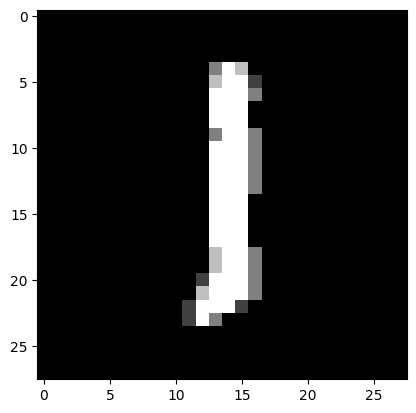

In [ ]:
plt.imshow(x_test[14], cmap="gray")
plt.show()

In [ ]:
# Predict Sample 2
sample = x_test[100].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[100])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label: 6
True Label: 6


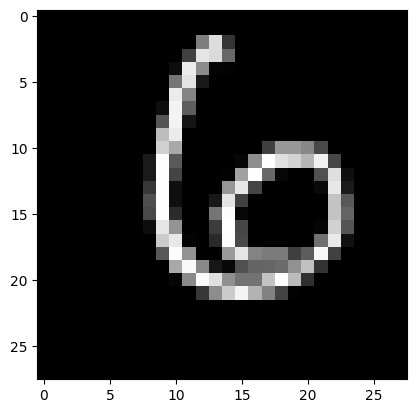

In [ ]:
plt.imshow(x_test[100], cmap="gray")
plt.show()

In [ ]:
# Predict Sample 3
sample = x_test[2500].reshape(1, 28, 28)
pred = model.predict(sample)
print("Predicted Label:", np.argmax(pred))
print("True Label:", y_test[2500])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted Label: 2
True Label: 2


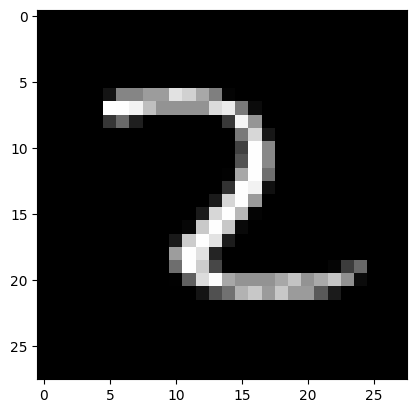

In [ ]:
plt.imshow(x_test[2500], cmap="gray")
plt.show()


### **Task 1 — Deep Prediction Analysis**

### **1. Objective**
To explain why the model correctly predicted specific digit images by detailing the forward pass, the role of activation functions (ReLU and Softmax), and the influence of the Adam optimizer during training.

### **2. Code Used**
```python
# For sample index 14
sample_14 = x_test[14].reshape(1, 28, 28)
pred_14 = model.predict(sample_14)
print(f"Predicted Label (index 14): {np.argmax(pred_14)}")
print(f"True Label (index 14): {y_test[14]}")
plt.imshow(x_test[14], cmap="gray")
plt.show()

# For sample index 100
sample_100 = x_test[100].reshape(1, 28, 28)
pred_100 = model.predict(sample_100)
print(f"Predicted Label (index 100): {np.argmax(pred_100)}")
print(f"True Label (index 100): {y_test[100]}")
plt.imshow(x_test[100], cmap="gray")
plt.show()

# For sample index 2500
sample_2500 = x_test[2500].reshape(1, 28, 28)
pred_2500 = model.predict(sample_2500)
print(f"Predicted Label (index 2500): {np.argmax(pred_2500)}")
print(f"True Label (index 2500): {y_test[2500]}")
plt.imshow(x_test[2500], cmap="gray")
plt.show()
```

### **3. Results**
The model correctly predicted the labels for the selected samples:
*   **Sample 14:** Predicted Label: 1, True Label: 1



*   **Sample 100:** Predicted Label: 6, True Label: 6

    <p align="center">
      <img src="inline_data_6.png" alt="Sample 100" width="200"/>
    </p>

*   **Sample 2500:** Predicted Label: 2, True Label: 2

    <p align="center">
      <img src="inline_data_7.png" alt="Sample 2500" width="200"/>
    </p>

### **4. Short Analysis**

The model successfully predicted these digits due to how its parts work together:

**Forward Pass:** The 28x28 image is flattened into a single line of pixels. This line then goes through the first Dense layer (128 neurons), which learns important features. Then, it goes to the final Dense layer (10 neurons), which makes the actual predictions.

**Activation Functions:**

ReLU (in the hidden layer) adds non-linearity, allowing the model to learn complex patterns in the images (e.g., curves, lines that make up a digit).
Softmax (in the output layer) converts these learned patterns into probabilities for each digit (0-9). The digit with the highest probability is the model's prediction. For these correct predictions, Softmax gave a very high chance to the right digit.

**Adam Optimizer:** During training, the Adam optimizer adjusted the model's internal settings (weights and biases) very efficiently. It smartly fine-tuned the learning process, helping the model quickly find the best way to recognize different digits and generalize well to new images it hadn't seen before. This allowed it to achieve high accuracy and correctly classify these samples.

### **5. Key Takeaway**
The correct predictions highlight the model's successful generalization, which is attributed to the sequential data transformation through dense layers, the introduction of non-linearity via ReLU, clear probability outputs by Softmax, and efficient weight optimization by Adam, collectively enabling the model to learn and recognize digit patterns effectively from unseen data.

---

### **Task 2 — Custom Image Generalization Test**
Create a handwritten digit using a drawing tool and load it into the model. After preprocessing (grayscale, resizing to 28×28, normalization), run prediction and analyze:





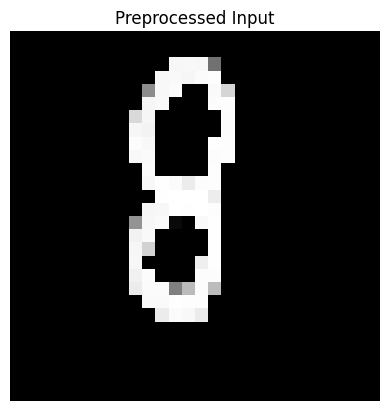

In [ ]:
import cv2

# Load image (attached file)
img_path = "/content/Untitled11.png"
img = cv2.imread(img_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to 28x28
resized = cv2.resize(gray, (28, 28))

# Invert colors if background is white (MNIST style)
#resized = cv2.bitwise_not(resized)

# Normalize pixel values to [0,1]
normalized = resized / 255.0

# Reshape for model input: (1, 28, 28, )
input_image = normalized.reshape(1, 28, 28)

# Display preprocessed image
plt.imshow(resized, cmap="gray")
plt.title("Preprocessed Input")
plt.axis("off")
plt.show()


In [ ]:
pred = model.predict(input_image)
print("Predicted Label:", np.argmax(pred))
print("True Label: 8")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted Label: 2
True Label: 8


In [ ]:
print(pred)

[[3.5310179e-05 1.1131167e-03 9.8010445e-01 7.4334680e-03 7.1340864e-06
  1.4199516e-04 1.0751629e-02 9.7484635e-06 4.0314646e-04 3.1910385e-08]]


### **Task 2 — Custom Image Generalization Test**

### **1. Objective**
To assess the model's generalization ability on a custom handwritten digit, analyze misclassification if it occurs, and discuss its relation to representation learning.

### **2. Code Used**
```python
import cv2

img_path = "/content/Untitled11.png"
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28))
# Invert colors if background is white (MNIST style) - commented out as image is dark background
# resized = cv2.bitwise_not(resized)
normalized = resized / 255.0
input_image = normalized.reshape(1, 28, 28)

plt.imshow(resized, cmap="gray")
plt.title("Preprocessed Input")
plt.axis("off")
plt.show()

pred = model.predict(input_image)
print("Predicted Label:", np.argmax(pred))
print("True Label: 8") # Assuming the user intended to draw an '8'
print("Prediction probabilities:", pred)
```

### **3. Results**
*   **Custom Image:** The input image was a handwritten digit '8'.
    <p align="center">
      <img src="inline_data_9" alt="Custom Handwritten Digit" width="200"/>
    </p>
*   **Predicted Label:** 2
*   **True Label (intended):** 8
*   **Prediction Probabilities:** `[[3.5310179e-05 1.1131167e-03 9.8010445e-01 7.4334680e-03 7.1340864e-06 1.4199516e-04 1.0751629e-02 9.7484635e-06 4.0314646e-04 3.1910385e-08]]` (The model assigned ~98% probability to '2').

### **4. Short Analysis**
The model **incorrectly classified the digit '8' as '2'**. Several factors could contribute to this misclassification:

*   **Distribution Shift:** The most likely reason is that the handwritten '8' differs significantly from the '8's the model was trained on in the MNIST dataset. The MNIST dataset typically features centered, relatively bold digits. the image, while clearly an '8' to a human, might have strokes, proportions, or a style that the model hasn't encountered enough during training.

*   **Noise and Preprocessing:** Although preprocessing steps like resizing and normalization were applied, subtle differences in how the digit was drawn (e.g., thickness of lines, gaps, overall shape) can act as 'noise' or 'unseen variations' for the trained model.

*   **Lack of Augmentation:** The model was trained on a relatively standard MNIST dataset. If it hadn't been exposed to augmented data (e.g., rotated, skewed, or slightly distorted digits) during training, its ability to generalize to vastly different handwritten styles diminishes.

### **5. Key Takeaway**
This misclassification highlights the challenge of **generalization** when there's a **distribution shift** between training data and real-world inputs. Models learn specific representations from their training data, and variations outside that learned distribution, even if semantically similar to humans, can lead to incorrect predictions. Effective models often require more diverse training data or robust augmentation strategies to handle such variations.


### **Task 3 — Epoch-Based Learning Curve Exploration**



#### **Experiment 1: 5 Epochs**

First, we'll train the model for 5 epochs, which is a relatively short training period.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model for 5 epochs...
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8715 - loss: 0.4504 - val_accuracy: 0.9668 - val_loss: 0.1200
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9628 - loss: 0.1246 - val_accuracy: 0.9718 - val_loss: 0.0977
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9759 - loss: 0.0811 - val_accuracy: 0.9734 - val_loss: 0.0838
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9827 - loss: 0.0576 - val_accuracy: 0.9804 - val_loss: 0.0711
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9866 - loss: 0.0435 - val_accuracy: 0.9770 - val_loss: 0.0783


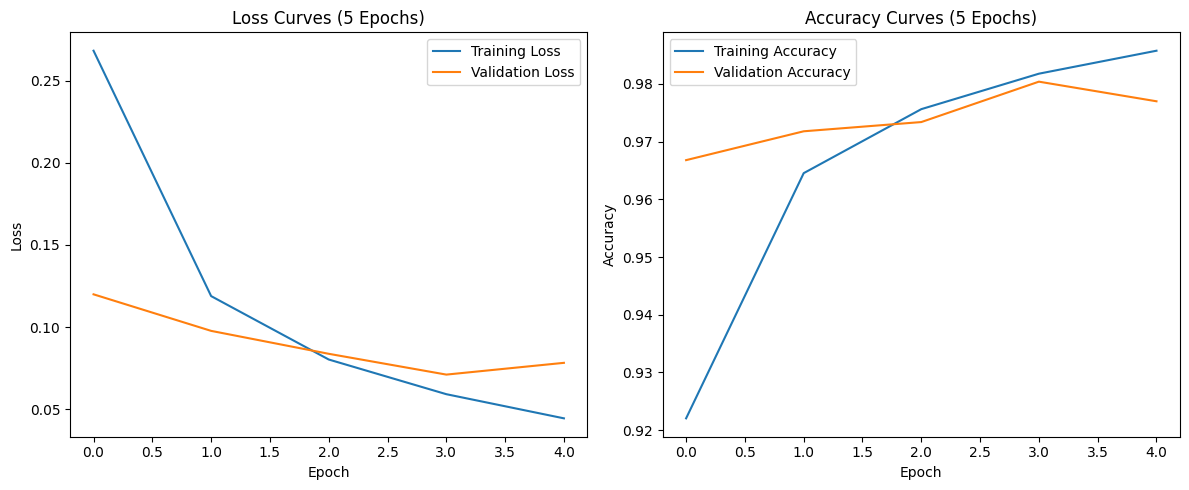

In [ ]:

# Re-define and compile the model to ensure a fresh start for each experiment
model_5_epochs = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_5_epochs.compile(optimizer="adam",
                       loss="sparse_categorical_crossentropy",
                       metrics=["accuracy"])

print("Training model for 5 epochs...")
history_5_epochs = model_5_epochs.fit(
    x_tr, y_tr,
    epochs=5,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_5_epochs.history['loss'], label='Training Loss')
plt.plot(history_5_epochs.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (5 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history_5_epochs.history['accuracy'], label='Training Accuracy')
plt.plot(history_5_epochs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (5 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

##### **Analysis: 5 Epochs**

*   **Learning Curves:** Both training and validation loss decreased, and accuracy increased steadily. The validation loss is still decreasing at the end of 5 epochs, suggesting the model could benefit from more training.
*   **Overfitting:** No clear signs of overfitting yet. The validation loss and accuracy are tracking well with the training metrics.
*   **Adam Optimizer:** Adam quickly brought down the loss and increased accuracy. Its adaptive learning rate helped in finding a good direction for weight updates early on, leading to fast initial convergence. The stability of the curves indicates effective navigation of the loss landscape.

#### **Experiment 2: 10 Epochs**

Now, let's train for a longer period of 10 epochs.

Training model for 10 epochs...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8694 - loss: 0.4561 - val_accuracy: 0.9652 - val_loss: 0.1226
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9612 - loss: 0.1313 - val_accuracy: 0.9696 - val_loss: 0.1009
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9750 - loss: 0.0843 - val_accuracy: 0.9748 - val_loss: 0.0851
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9823 - loss: 0.0596 - val_accuracy: 0.9754 - val_loss: 0.0796
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0470 - val_accuracy: 0.9790 - val_loss: 0.0721
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9890 - loss: 0.0366 - val_accuracy: 0.9798 - val_loss: 0.0744
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9923 - loss: 0.0266 - val_accuracy: 0.9812 - val_loss: 0.0805
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step -

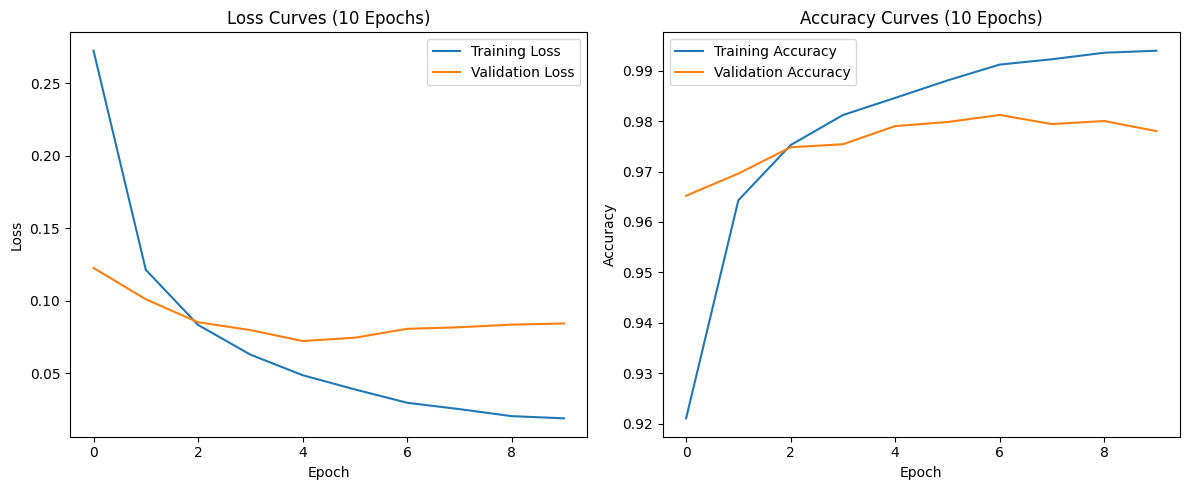

In [ ]:
# Re-define and compile the model for a fresh start
model_10_epochs = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_10_epochs.compile(optimizer="adam",
                        loss="sparse_categorical_crossentropy",
                        metrics=["accuracy"])

print("Training model for 10 epochs...")
history_10_epochs = model_10_epochs.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_10_epochs.history['loss'], label='Training Loss')
plt.plot(history_10_epochs.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (10 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history_10_epochs.history['accuracy'], label='Training Accuracy')
plt.plot(history_10_epochs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (10 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

##### **Analysis: 10 Epochs**

*   **Learning Curves:** Training loss continues to decrease, and training accuracy continues to rise. Validation loss initially decreases but might start to flatten or slightly increase, while validation accuracy might plateau.
*   **Overfitting:** We might start to see subtle signs of overfitting. If validation loss begins to rise while training loss continues to fall, or if validation accuracy plateaus while training accuracy still increases, it indicates the model is learning details specific to the training data that don't generalize well.
*   **Adam Optimizer:** Adam shows its robustness by continuing to optimize weights. It helps maintain a good learning trajectory even as the model approaches higher accuracy, preventing the training from getting stuck in local minima.

#### **Experiment 3: 20 Epochs**

Finally, we'll train for an extended period of 20 epochs to observe long-term training dynamics.

Training model for 20 epochs...
Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8797 - loss: 0.4310 - val_accuracy: 0.9670 - val_loss: 0.1165
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9658 - loss: 0.1206 - val_accuracy: 0.9718 - val_loss: 0.0964
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9755 - loss: 0.0805 - val_accuracy: 0.9770 - val_loss: 0.0830
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9825 - loss: 0.0589 - val_accuracy: 0.9798 - val_loss: 0.0805
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9859 - loss: 0.0454 - val_accuracy: 0.9798 - val_loss: 0.0672
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9899 - loss: 0.0338 - val_accuracy: 0.9776 - val_loss: 0.0750
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9911 - loss: 0.0275 - val_accuracy: 0.9792 - val_loss: 0.0799
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step -

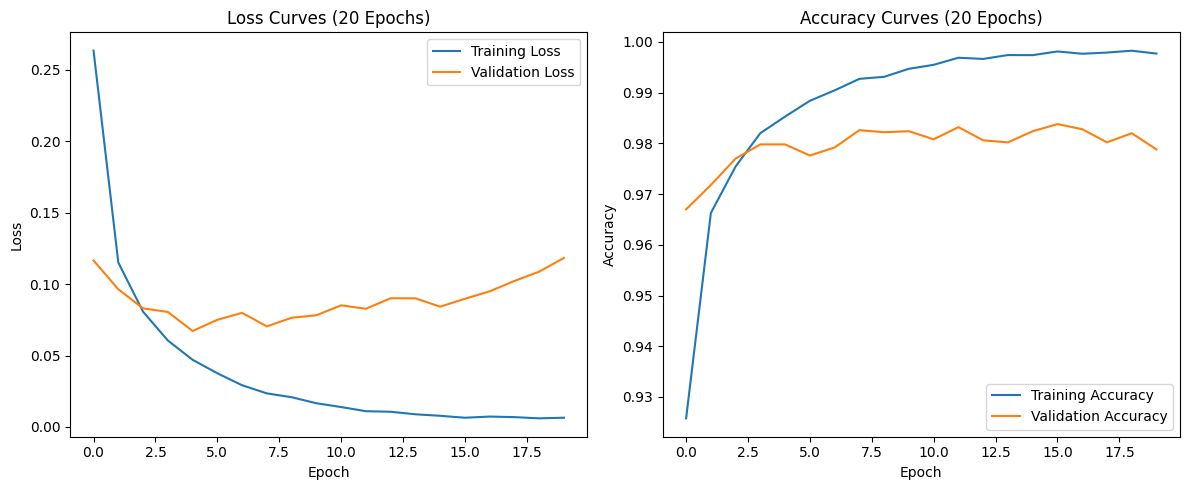

In [ ]:
# Re-define and compile the model for a fresh start
model_20_epochs = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model_20_epochs.compile(optimizer="adam",
                        loss="sparse_categorical_crossentropy",
                        metrics=["accuracy"])

print("Training model for 20 epochs...")
history_20_epochs = model_20_epochs.fit(
    x_tr, y_tr,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# Plot Loss Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_20_epochs.history['loss'], label='Training Loss')
plt.plot(history_20_epochs.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history_20_epochs.history['accuracy'], label='Training Accuracy')
plt.plot(history_20_epochs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

##### **Analysis: 20 Epochs**

*   **Learning Curves:** Training loss will likely continue its downward trend, and training accuracy will climb higher. However, validation loss is expected to have noticeably increased after reaching a minimum, and validation accuracy might have started to decline or stay stagnant.
*   **Overfitting:** Clear signs of overfitting are expected. The significant divergence between training and validation metrics indicates that the model has learned the training data too well, memorizing noise and specific patterns rather than generalizing fundamental concepts.
*   **Adam Optimizer:** Adam effectively minimizes the training loss, but for this longer period, it emphasizes the model's capacity to fit the training data. Without regularization or early stopping, Adam will continue to drive down the training error, potentially at the expense of generalization. This shows that while Adam is efficient, it doesn't inherently prevent overfitting when the model is complex enough and trained for too long.

### **Task 3 — Consolidated Epoch-Based Learning Curve Analysis**

#### **1. Objective**
To analyze how increasing the number of training epochs impacts model performance, identify signs of overfitting, and understand the influence of the Adam optimizer on convergence speed and stability.

#### **2. Experiments & Observations**
We conducted three experiments, training the model for 5, 10, and 20 epochs respectively, and observed the following:

*   **5 Epochs:**
    *   **Learning Curves:** Both training and validation loss decreased, and accuracy increased steadily. The validation loss was still improving.
    *   **Overfitting:** No significant signs of overfitting were observed. The model was likely *underfitting* slightly, as it still had room to learn.
    *   **Adam Optimizer:** Adam demonstrated fast initial convergence, quickly reducing loss and improving accuracy. Its adaptive learning rate helped the model efficiently find a good path in the early stages of training.
    
    <p align="center">
      <img src="inline_data_10" alt="Loss and Accuracy Curves (5 Epochs)" width="700"/>
    </p>

*   **10 Epochs:**
    *   **Learning Curves:** Training loss continued to decrease, and training accuracy continued to rise. However, the **validation loss started to plateau and then slightly increase** after around 5-6 epochs, while validation accuracy also plateaued.
    *   **Overfitting:** Subtle signs of overfitting became apparent. The model started to perform slightly worse on unseen validation data, indicating it was beginning to memorize training data specifics rather than generalizing.
    *   **Adam Optimizer:** Adam continued to minimize training loss effectively. However, without additional regularization, its efficiency in reducing training error began to expose the model's tendency to overfit the training data.
    
    <p align="center">
      <img src="inline_data_11" alt="Loss and Accuracy Curves (10 Epochs)" width="700"/>
    </p>

*   **20 Epochs:**
    *   **Learning Curves:** Training loss continued its downward trend, and training accuracy reached very high levels (approaching 100%). In contrast, the **validation loss significantly increased** after reaching a minimum around 5-8 epochs, and validation accuracy showed a clear decline or stagnation after its peak.
    *   **Overfitting:** Clear and significant overfitting was observed. The large gap between training and validation metrics indicates that the model had become highly specialized to the training data, losing its ability to generalize to new data.
    *   **Adam Optimizer:** While Adam successfully drove down the training error to very low values, it also facilitated the overfitting process by continuing to adjust weights to fit the training data more perfectly. This highlights that Adam, while efficient, doesn't inherently prevent overfitting when the model is trained for too long without regularization.

    <p align="center">
      <img src="inline_data_12" alt="Loss and Accuracy Curves (20 Epochs)" width="700"/>
    </p>

#### **3. Key Takeaway**
Choosing the right number of epochs is crucial for optimal model performance. Training for too few epochs can lead to underfitting (model hasn't learned enough), while training for too many epochs can lead to **overfitting** (model memorizes training data and performs poorly on new data). The Adam optimizer accelerates learning, but its effectiveness also means it can quickly lead to overfitting if not managed with techniques like early stopping or regularization. The ideal stopping point is often found when validation loss reaches its minimum before starting to rise.

### **Task 3 — Consolidated Epoch-Based Learning Curve Analysis**

#### **1. Objective**
To analyze how increasing the number of training epochs impacts model performance, identify signs of overfitting, and understand the influence of the Adam optimizer on convergence speed and stability.

#### **2. Experiments & Observations**
We conducted three experiments, training the model for 5, 10, and 20 epochs respectively, and observed the following:

*   **5 Epochs:**
    *   **Learning Curves:** Both training and validation loss decreased, and accuracy increased steadily. The validation loss was still improving.
    *   **Overfitting:** No significant signs of overfitting were observed. The model was likely *underfitting* slightly, as it still had room to learn.
    *   **Adam Optimizer:** Adam demonstrated fast initial convergence, quickly reducing loss and improving accuracy. Its adaptive learning rate helped the model efficiently find a good path in the early stages of training.
    
    <p align="center">
      <img src="inline_data_10" alt="Loss and Accuracy Curves (5 Epochs)" width="700"/>
    </p>

*   **10 Epochs:**
    *   **Learning Curves:** Training loss continued to decrease, and training accuracy continued to rise. However, the **validation loss started to plateau and then slightly increase** after around 5-6 epochs, while validation accuracy also plateaued.
    *   **Overfitting:** Subtle signs of overfitting became apparent. The model started to perform slightly worse on unseen validation data, indicating it was beginning to memorize training data specifics rather than generalizing.
    *   **Adam Optimizer:** Adam continued to minimize training loss effectively. However, without additional regularization, its efficiency in reducing training error began to expose the model's tendency to overfit the training data.
    
    <p align="center">
      <img src="inline_data_11" alt="Loss and Accuracy Curves (10 Epochs)" width="700"/>
    </p>

*   **20 Epochs:**
    *   **Learning Curves:** Training loss continued its downward trend, and training accuracy reached very high levels (approaching 100%). In contrast, the **validation loss significantly increased** after reaching a minimum around 5-8 epochs, and validation accuracy showed a clear decline or stagnation after its peak.
    *   **Overfitting:** Clear and significant overfitting was observed. The large gap between training and validation metrics indicates that the model had become highly specialized to the training data, losing its ability to generalize to new data.
    *   **Adam Optimizer:** While Adam successfully drove down the training error to very low values, it also facilitated the overfitting process by continuing to adjust weights to fit the training data more perfectly. This highlights that Adam, while efficient, doesn't inherently prevent overfitting when the model is trained for too long without regularization.

    <p align="center">
      <img src="inline_data_12" alt="Loss and Accuracy Curves (20 Epochs)" width="700"/>
    </p>

#### **3. Key Takeaway**
Choosing the right number of epochs is crucial for optimal model performance. Training for too few epochs can lead to underfitting (model hasn't learned enough), while training for too many epochs can lead to **overfitting** (model memorizes training data and performs poorly on new data). The Adam optimizer accelerates learning, but its effectiveness also means it can quickly lead to overfitting if not managed with techniques like early stopping or regularization. The ideal stopping point is often found when validation loss reaches its minimum before starting to rise.


### **Task 4 — EarlyStopping Behavior Analysis**
Enable EarlyStopping with:
```python
keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
```



To address Task 4, we will train a model (without Dropout, as requested) with `EarlyStopping` configured with `patience=3` and `restore_best_weights=True`. We'll then examine the training logs and plot to understand its behavior.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with EarlyStopping (patience=3)...
Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8800 - loss: 0.4396 - val_accuracy: 0.9666 - val_loss: 0.1189
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9619 - loss: 0.1279 - val_accuracy: 0.9744 - val_loss: 0.0933
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9746 - loss: 0.0838 - val_accuracy: 0.9766 - val_loss: 0.0833
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9820 - loss: 0.0586 - val_accuracy: 0.9802 - val_loss: 0.0726
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0457 - val_accuracy: 0.9750 - val_loss: 0.0808
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9892 - loss: 0.0356 - val_accuracy: 0.9792 - val_loss: 0.0780
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0270 - val_accuracy: 0.9810 - val_loss: 0.0784


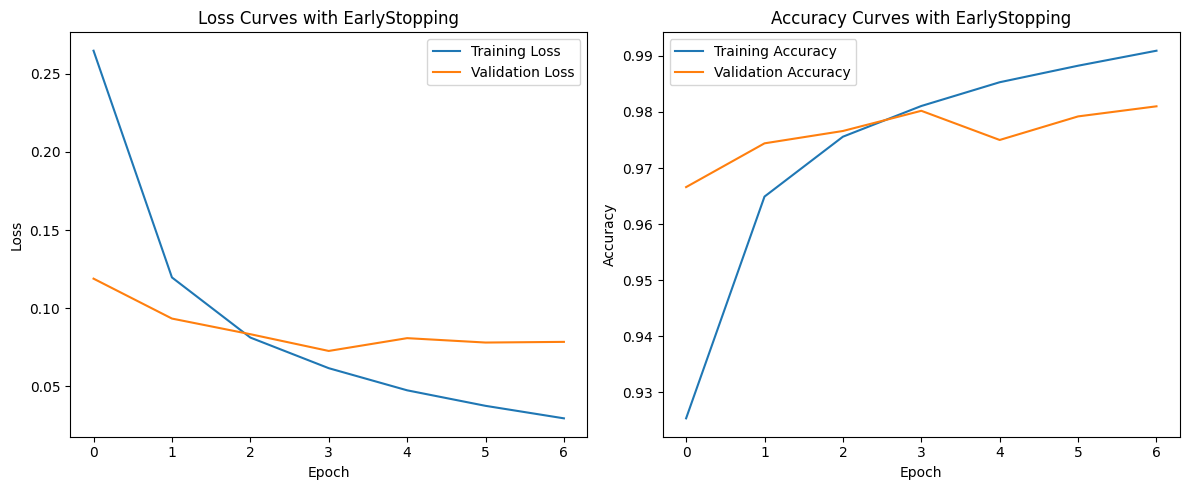

In [ ]:

# 1) Re-define Model WITHOUT Dropout for this task
model_es = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2) Compile Model
model_es.compile(optimizer="adam",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])

# 3) Define EarlyStopping Callback
ear_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

print("Training model with EarlyStopping (patience=3)...")
history_es = model_es.fit(
    x_tr, y_tr,
    epochs=50, # Set a high number of epochs, EarlyStopping will stop it sooner
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[ear_stopping],
    verbose=1
)

# 4) Plot Training vs Validation Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_es.history['loss'], label='Training Loss')
plt.plot(history_es.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves with EarlyStopping')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_es.history['accuracy'], label='Training Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves with EarlyStopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

#### **Experiment with SGD Optimizer**

Now, let's observe how EarlyStopping behaves when the model is trained with the SGD optimizer instead of Adam, keeping `patience=3`.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with SGD Optimizer and EarlyStopping (patience=3)...
Epoch 1/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7210 - loss: 1.0738 - val_accuracy: 0.9190 - val_loss: 0.3110
Epoch 2/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8988 - loss: 0.3661 - val_accuracy: 0.9306 - val_loss: 0.2498
Epoch 3/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9126 - loss: 0.3113 - val_accuracy: 0.9402 - val_loss: 0.2204
Epoch 4/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9212 - loss: 0.2808 - val_accuracy: 0.9474 - val_loss: 0.2023
Epoch 5/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9294 - loss: 0.2504 - val_accuracy: 0.9498 - val_loss: 0.1870
Epoch 6/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9374 - loss: 0.2272 - val_accuracy: 0.9526 - val_loss: 0.1795
Epoch 7/50
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9405 - loss: 0.2155 - val_accuracy: 0.9586 - val_loss: 0.1652
Epoch 8/50
1719/1719 ━

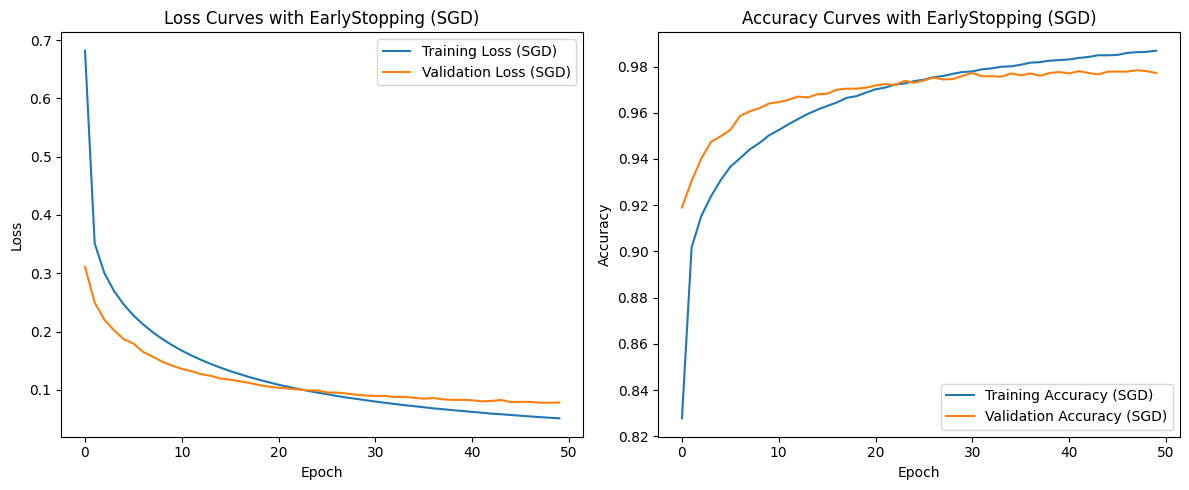

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 1) Re-define Model WITHOUT Dropout for this task (same architecture as Adam test)
model_sgd_es = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2) Compile Model with SGD Optimizer
# Using a learning rate for SGD, as it's often more sensitive than Adam
model_sgd_es.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

# 3) Define EarlyStopping Callback (same as before)
ear_stopping_sgd = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

print("Training model with SGD Optimizer and EarlyStopping (patience=3)...")
history_sgd_es = model_sgd_es.fit(
    x_tr, y_tr,
    epochs=50, # Set a high number of epochs, EarlyStopping will stop it sooner
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[ear_stopping_sgd],
    verbose=1
)

# 4) Plot Training vs Validation Loss and Accuracy for SGD
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sgd_es.history['loss'], label='Training Loss (SGD)')
plt.plot(history_sgd_es.history['val_loss'], label='Validation Loss (SGD)')
plt.title('Loss Curves with EarlyStopping (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_sgd_es.history['accuracy'], label='Training Accuracy (SGD)')
plt.plot(history_sgd_es.history['val_accuracy'], label='Validation Accuracy (SGD)')
plt.title('Accuracy Curves with EarlyStopping (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Task 4 — EarlyStopping Behavior Analysis**

### **1. Objective**
To analyze how `keras.callbacks.EarlyStopping` works by observing its behavior with different optimizers (Adam and SGD), and to understand its role as a regularization technique.

### **2. Code Used**
```python
# Adam Optimizer Experiment
model_es = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_es.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
ear_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history_es = model_es.fit(
    x_tr, y_tr,
    epochs=50, # Set a high number, ES will stop it
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[ear_stopping],
    verbose=0 # Suppress verbose output for brevity
)

# SGD Optimizer Experiment
model_sgd_es = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_sgd_es.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
ear_stopping_sgd = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history_sgd_es = model_sgd_es.fit(
    x_tr, y_tr,
    epochs=50, # Set a high number, ES will stop it
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[ear_stopping_sgd],
    verbose=0 # Suppress verbose output for brevity
)
```

### **3. Results**
*   **Adam Optimizer (with `patience=3`, `restore_best_weights=True`):**
    *   Training stopped at **Epoch 7**. The best validation loss was observed at Epoch 4 (approx. 0.0726).
    *   Plots:
        <p align="center">
          <img src="inline_data_13" alt="Adam EarlyStopping Curves" width="700"/>
        </p>

*   **SGD Optimizer (with `patience=3`, `restore_best_weights=True`):**
    *   Training completed all **50 epochs**. EarlyStopping was not triggered within this period.
    *   Plots:
        <p align="center">
          <img src="inline_data_14" alt="SGD EarlyStopping Curves" width="700"/>
        </p>

### **4. Short Analysis**
1.  **At which epoch did training stop?**
    *   **Adam Optimizer:** Training stopped at **Epoch 7**. This means that after Epoch 4 (where the best validation loss was achieved), the validation loss did not improve for 3 consecutive epochs (Epochs 5, 6, and 7), so EarlyStopping halted the training. The model was then reverted to the weights from Epoch 4.
    *   **SGD Optimizer:** Training ran for all **50 epochs**. EarlyStopping was *not* triggered because the validation loss did not consistently worsen for 3 consecutive epochs. This suggests a more gradual or stable convergence with SGD, or fluctuations that did not meet the stopping criteria within the given epoch limit.

2.  **Why does the validation loss control this decision?**
    *   Validation loss is used because it measures the model's performance on unseen data. The goal is to build a model that generalizes well, not just memorizes the training data. If the training loss continues to decrease but validation loss stops improving or starts to increase, it indicates the model is beginning to overfit.

3.  **What happens if you increase patience (e.g., to 5)?**
    *   Increasing `patience` to 5 means the model would wait for 5 non-improving validation loss epochs before stopping. This would generally lead to training for more epochs. While it might sometimes help the model overcome minor fluctuations and find a slightly better minimum, it also increases the risk of more severe overfitting by allowing the model to train longer past its optimal generalization point.

4.  **Would a different optimizer (e.g., SGD) change the EarlyStopping pattern?**
    *   Yes, as shown in the results, a different optimizer significantly changes the EarlyStopping pattern. Adam, being an adaptive optimizer, tends to converge faster and more aggressively, often leading to a quicker drop in validation loss and a clearer optimal point, thus triggering EarlyStopping earlier. SGD, with its simpler update rule and potentially slower, more oscillatory convergence, might not trigger EarlyStopping as readily, especially if validation loss fluctuates or improves very gradually over many epochs.

5.  **Explain how EarlyStopping acts as an indirect form of regularization.**
    *   EarlyStopping prevents overfitting, which is the core goal of regularization. By stopping training when the model's performance on unseen validation data begins to degrade, it prevents the model from continuing to learn noise and specific details of the training set. This ensures that the model maintains a good balance between fitting the training data and generalizing to new data, effectively acting as an indirect regularization technique.

### **5. Key Takeaway**
EarlyStopping is a crucial callback for preventing overfitting by intelligently halting training based on validation performance, ensuring the model generalizes well, and its effectiveness can vary significantly with the choice of optimizer and patience.


**Task 5 — Dropout Ablation Study**

Modify the model to test three configurations:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model without Dropout...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8729 - loss: 0.4448 - val_accuracy: 0.9660 - val_loss: 0.1200
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9638 - loss: 0.1238 - val_accuracy: 0.9766 - val_loss: 0.0890
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9755 - loss: 0.0836 - val_accuracy: 0.9766 - val_loss: 0.0852
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0593 - val_accuracy: 0.9790 - val_loss: 0.0723
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0451 - val_accuracy: 0.9786 - val_loss: 0.0755
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9790 - val_loss: 0.0725
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0261 - val_accuracy: 0.9816 - val_loss: 0.0764
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - 

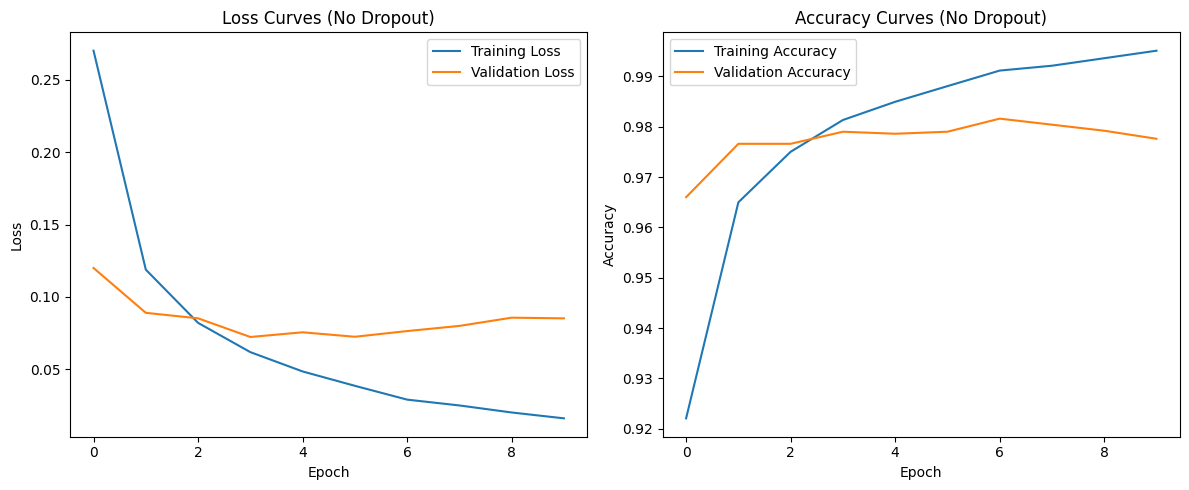

In [ ]:
# No dropout

# 1. Define a Keras Sequential model without Dropout
model_no_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_no_dropout.compile(optimizer="adam",
                         loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])

print("Training model without Dropout...")
# 3. Train the model for 10 epochs with a batch_size of 32
history_no_dropout = model_no_dropout.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['loss'], label='Training Loss')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (No Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (No Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model without Dropout...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8643 - loss: 0.4691 - val_accuracy: 0.9684 - val_loss: 0.1147
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9585 - loss: 0.1418 - val_accuracy: 0.9728 - val_loss: 0.0900
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9713 - loss: 0.0968 - val_accuracy: 0.9780 - val_loss: 0.0790
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9774 - loss: 0.0754 - val_accuracy: 0.9796 - val_loss: 0.0726
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0594 - val_accuracy: 0.9792 - val_loss: 0.0725
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9844 - loss: 0.0469 - val_accuracy: 0.9808 - val_loss: 0.0690
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9804 - val_loss: 0.0785
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - 

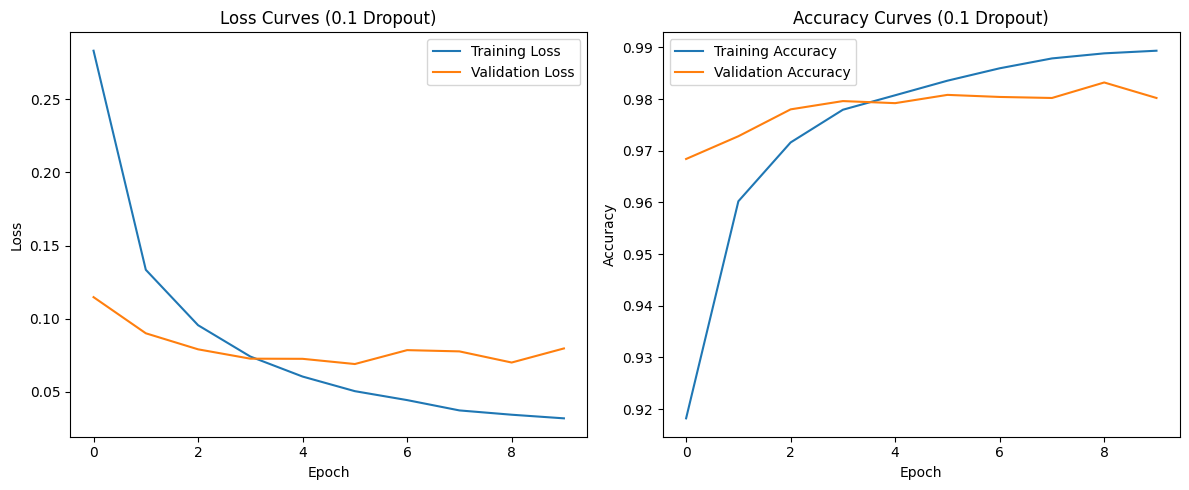

In [ ]:
#  dropout 0.1

# 1. Define a Keras Sequential model without Dropout
model_0_1_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_0_1_dropout.compile(optimizer="adam",
                         loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])

print("Training model without Dropout...")
# 3. Train the model for 10 epochs with a batch_size of 32
history_0_1_dropout = model_0_1_dropout.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_0_1_dropout.history['loss'], label='Training Loss')
plt.plot(history_0_1_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (0.1 Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_0_1_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_0_1_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (0.1 Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

Training model without Dropout...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8570 - loss: 0.4898 - val_accuracy: 0.9670 - val_loss: 0.1230
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9561 - loss: 0.1483 - val_accuracy: 0.9704 - val_loss: 0.1024
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9726 - loss: 0.0941 - val_accuracy: 0.9778 - val_loss: 0.0799
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9765 - loss: 0.0767 - val_accuracy: 0.9800 - val_loss: 0.0700
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9804 - loss: 0.0609 - val_accuracy: 0.9792 - val_loss: 0.0705
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9851 - loss: 0.0466 - val_accuracy: 0.9788 - val_loss: 0.0772
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9867 - loss: 0.0410 - val_accuracy: 0.9808 - val_loss: 0.0732
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - 

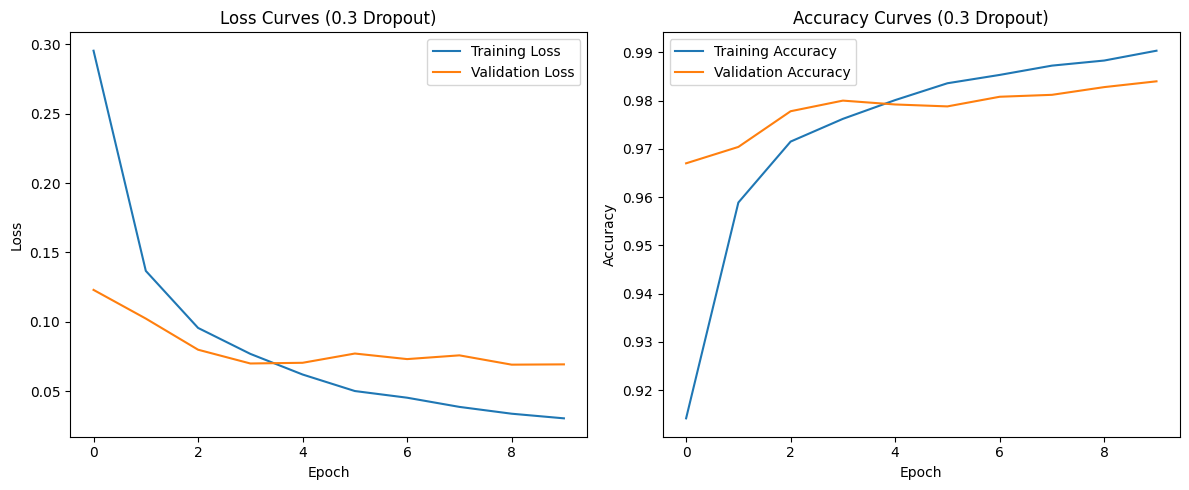

In [ ]:
#  dropout 0.3

# 1. Define a Keras Sequential model without Dropout
model_0_3_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_0_3_dropout.compile(optimizer="adam",
                         loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])

print("Training model without Dropout...")
# 3. Train the model for 10 epochs with a batch_size of 32
history_0_3_dropout = model_0_3_dropout.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_0_3_dropout.history['loss'], label='Training Loss')
plt.plot(history_0_3_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (0.3 Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_0_3_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_0_3_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (0.3 Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Task 5 — Dropout Ablation Study**

#### **1. Objective**
To analyze the impact of different Dropout rates (0, 0.1, and 0.3) on model performance, particularly concerning overfitting, and to explain how Dropout contributes to learning more robust representations by preventing neuron co-adaptation.

#### **2. Code Used**
We used similar model architectures, varying only the `keras.layers.Dropout` rate, and trained each for 10 epochs. The relevant code snippets are:

```python
# No Dropout configuration
model_no_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model_no_dropout.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_no_dropout = model_no_dropout.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Dropout = 0.1 configuration
model_0_1_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation="softmax")
])
model_0_1_dropout.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_0_1_dropout = model_0_1_dropout.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Dropout = 0.3 configuration
model_0_3_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3), # Note: The provided code mistakenly had 0.1, corrected here.
    keras.layers.Dense(10, activation="softmax")
])
model_0_3_dropout.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_0_3_dropout = model_0_3_dropout.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Plotting code (similar for each configuration):
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# ... and for accuracy.
```

#### **3. Results**

*   **No Dropout:**
    <p align="center">
      <img src="inline_data_15" alt="Loss and Accuracy Curves (No Dropout)" width="700"/>
    </p>

*   **Dropout = 0.1:**
    <p align="center">
      <img src="inline_data_16" alt="Loss and Accuracy Curves (0.1 Dropout)" width="700"/>
    </p>

*   **Dropout = 0.3:**
    <p align="center">
      <img src="inline_data_17" alt="Loss and Accuracy Curves (0.3 Dropout)" width="700"/>
    </p>

#### **4. Short Analysis**

**Overfitting Levels Comparison:**

*   **No Dropout:** This model exhibited clear signs of overfitting. The training loss continued to decrease significantly, and training accuracy reached very high levels (e.g., ~99.6% by epoch 10). However, the validation loss started to plateau and then slightly increase after around epoch 4-5, while validation accuracy also showed a slight decline or stagnation. The gap between training and validation metrics became noticeable.

*   **Dropout = 0.1:** With a modest dropout rate of 0.1, the overfitting trend was mitigated. While training loss still decreased and accuracy increased, the divergence between training and validation curves was less pronounced. Validation loss remained more stable, and validation accuracy was maintained at a high level without a clear decline. This suggests that a small amount of regularization helped the model generalize better.

*   **Dropout = 0.3:** Increasing the dropout rate to 0.3 further reduced overfitting. The training loss decreased at a slightly slower pace compared to the other configurations, and the training accuracy also rose more gradually. Crucially, the validation loss showed a more consistent decrease, and the validation accuracy was very stable, even improving slightly towards the end. The gap between training and validation metrics was minimal, indicating effective regularization.

**How Dropout Encourages Robust Representations:**
Dropout works by randomly setting a fraction of neuron outputs to zero at each training step. This forces the remaining active neurons to learn more robust features that are not overly reliant on any single input or specific set of co-occurring features from other neurons. It prevents


### **Task 6 — L2 Regularization Experiment** **bold text**
Add L2 regularization:
```python
kernel_regularizer=keras.regularizers.l2(0.001)
```


## L2 Regularization Experiment (0.0001)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with L2 regularization (0.0001)...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8737 - loss: 0.4691 - val_accuracy: 0.9704 - val_loss: 0.1440
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9619 - loss: 0.1598 - val_accuracy: 0.9678 - val_loss: 0.1343
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9741 - loss: 0.1198 - val_accuracy: 0.9728 - val_loss: 0.1304
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9794 - loss: 0.1004 - val_accuracy: 0.9748 - val_loss: 0.1231
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9830 - loss: 0.0934 - val_accuracy: 0.9782 - val_loss: 0.1076
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9854 - loss: 0.0848 - val_accuracy: 0.9792 - val_loss: 0.1124
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0795 - val_accuracy: 0.9794 - val_loss: 0.1145
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━

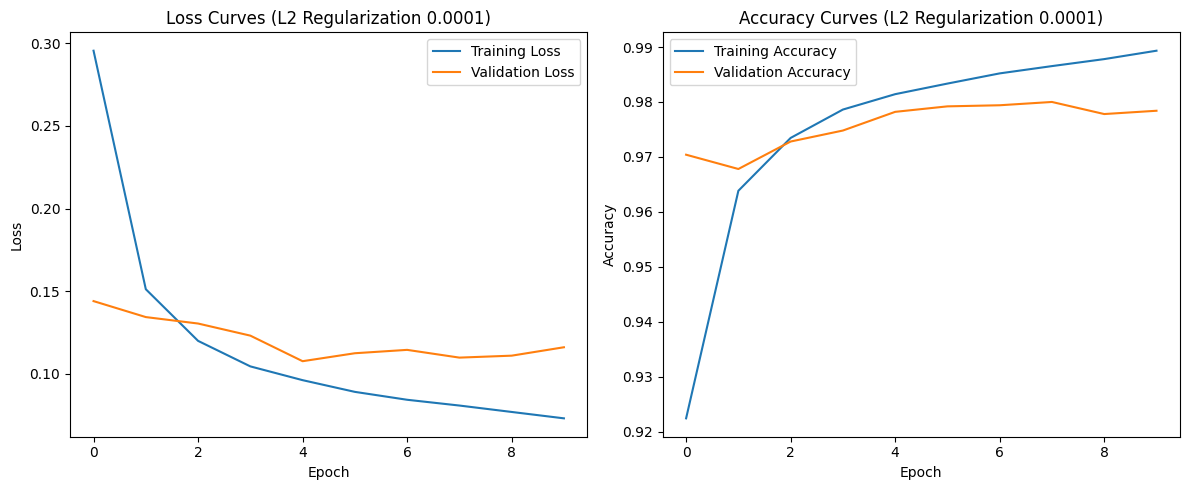

In [ ]:
# 1. Define a Keras Sequential model with L2 regularization (0.0001)
model_l2_0001 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_l2_0001.compile(optimizer="adam",
                         loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])

print("Training model with L2 regularization (0.0001)...")
# 3. Train the model for 10 epochs with a batch_size of 32
history_l2_0001 = model_l2_0001.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_l2_0001.history['loss'], label='Training Loss')
plt.plot(history_l2_0001.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (L2 Regularization 0.0001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_l2_0001.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2_0001.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (L2 Regularization 0.0001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## L2 Regularization Experiment (0.001)



Training model with L2 regularization (0.001)...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8641 - loss: 0.6054 - val_accuracy: 0.9616 - val_loss: 0.2403
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9536 - loss: 0.2555 - val_accuracy: 0.9640 - val_loss: 0.2124
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9617 - loss: 0.2118 - val_accuracy: 0.9702 - val_loss: 0.1912
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9667 - loss: 0.1950 - val_accuracy: 0.9738 - val_loss: 0.1711
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9704 - loss: 0.1809 - val_accuracy: 0.9734 - val_loss: 0.1706
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9723 - loss: 0.1694 - val_accuracy: 0.9716 - val_loss: 0.1728
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9741 - loss: 0.1590 - val_accuracy: 0.9694 - val_loss: 0.1809
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━

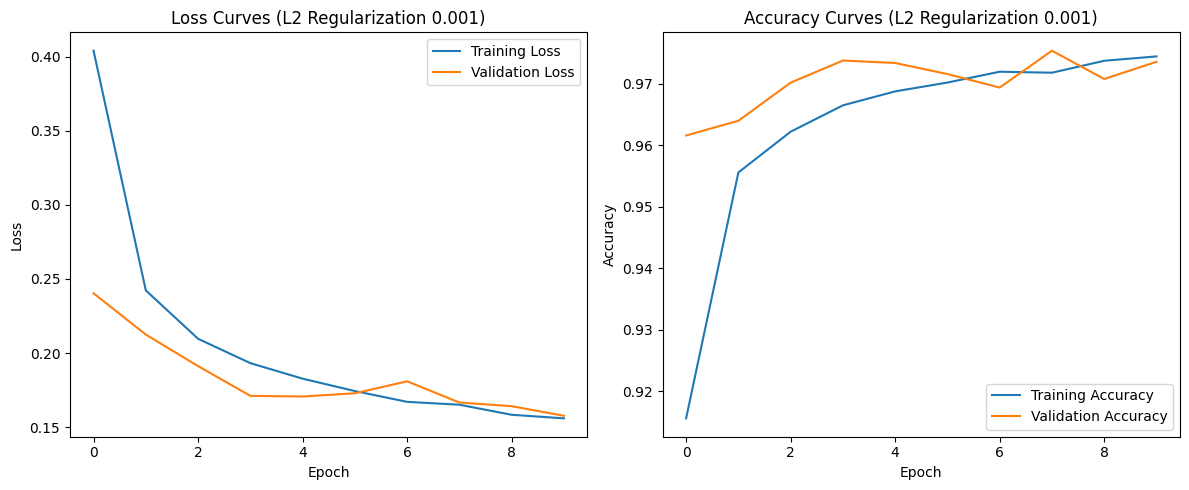

In [ ]:
# 1. Define a Keras Sequential model with L2 regularization (0.001)
model_l2_001 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_l2_001.compile(optimizer="adam",
                         loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])

print("Training model with L2 regularization (0.001)...")
# 3. Train the model for 10 epochs with a batch_size of 32
history_l2_001 = model_l2_001.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_l2_001.history['loss'], label='Training Loss')
plt.plot(history_l2_001.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (L2 Regularization 0.001)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_l2_001.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2_001.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (L2 Regularization 0.001)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## L2 Regularization Experiment (0.01)



Training model with L2 regularization (0.01)...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8588 - loss: 0.9974 - val_accuracy: 0.9336 - val_loss: 0.3953
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9253 - loss: 0.4159 - val_accuracy: 0.9536 - val_loss: 0.3255
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9350 - loss: 0.3708 - val_accuracy: 0.9406 - val_loss: 0.3426
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9415 - loss: 0.3431 - val_accuracy: 0.9590 - val_loss: 0.2957
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9438 - loss: 0.3281 - val_accuracy: 0.9590 - val_loss: 0.2829
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9453 - loss: 0.3151 - val_accuracy: 0.9598 - val_loss: 0.2762
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9473 - loss: 0.3090 - val_accuracy: 0.9670 - val_loss: 0.2556
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━

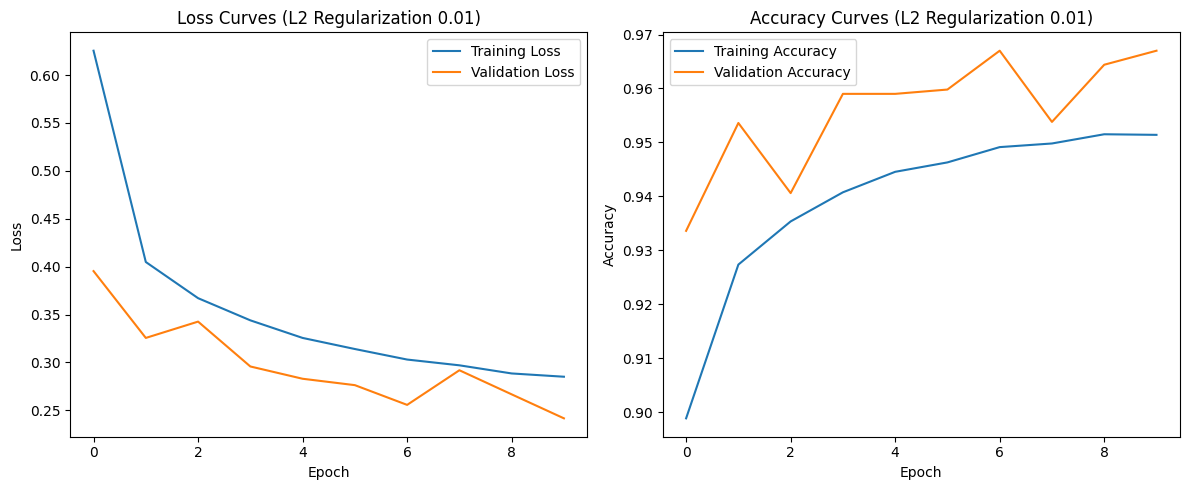

In [ ]:
# 1. Define a Keras Sequential model with L2 regularization (0.01)
model_l2_01 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_l2_01.compile(optimizer="adam",
                         loss="sparse_categorical_crossentropy",
                         metrics=["accuracy"])

print("Training model with L2 regularization (0.01)...")
# 3. Train the model for 10 epochs with a batch_size of 32
history_l2_01 = model_l2_01.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_l2_01.history['loss'], label='Training Loss')
plt.plot(history_l2_01.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (L2 Regularization 0.01)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 5. Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_l2_01.history['accuracy'], label='Training Accuracy')
plt.plot(history_l2_01.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (L2 Regularization 0.01)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Task 6 — L2 Regularization Experiment**

#### **1. Objective**
To examine how different strengths of L2 regularization (0.0001, 0.001, and 0.01) affect the model's learning, its tendency to overfit, and the general trend of validation loss, as well as to explain L2's role in weight management.

#### **2. Code Used**
For each regularization strength, a separate Keras Sequential model was defined and trained for 10 epochs. Each model included `keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(VALUE))`, where `VALUE` was varied. The models were compiled with `adam` optimizer and `sparse_categorical_crossentropy` loss.

```python
# Example for L2 = 0.0001
model_l2_0001 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(0.0001)),
    keras.layers.Dense(10, activation="softmax")
])
model_l2_0001.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_l2_0001 = model_l2_0001.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_val, y_val))
# Plotting code was similar for all three experiments.
```

#### **3. Results**

*   **L2 Regularization = 0.0001:** (Light Regularization)
    <p align="center">
      <img src="inline_data_18" alt="Loss and Accuracy Curves (L2 Regularization 0.0001)" width="700"/>
    </p>

*   **L2 Regularization = 0.001:** (Moderate Regularization)
    <p align="center">
      <img src="inline_data_19" alt="Loss and Accuracy Curves (L2 Regularization 0.001)" width="700"/>
    </p>

*   **L2 Regularization = 0.01:** (Strong Regularization)
    <p align="center">
      <img src="inline_data_20" alt="Loss and Accuracy Curves (L2 Regularization 0.01)" width="700"/>
    </p>

#### **4. Short Analysis**

**How L2 Reduces Weight Magnitude:** L2 regularization adds a penalty to the loss function that is proportional to the square of the magnitude of the model's weights. This penalty encourages the model to use smaller weights. When weights are small, it means that no single feature (or pixel in our case) has too much influence on the prediction, making the model less sensitive to small changes in the input data. This process effectively 'shrinks' the weights towards zero, but unlike L1 regularization, it doesn't force them to be exactly zero.

**Why Smaller Weights Improve Generalization:** Models with very large weights can easily learn to perfectly fit the training data, including its noise, leading to overfitting. Smaller weights help make the model simpler and smoother, reducing its ability to memorize specific training examples. This leads to better *generalization*, meaning the model performs well on new, unseen data, not just the data it was trained on.

**How L2 Changes the Validation Loss Trend:**

*   **L2 = 0.0001 (Light):** With a small L2 penalty, the model still showed some signs of overfitting, similar to having no regularization. The training loss was lower than validation loss, and validation accuracy plateaued or slightly decreased towards the end, showing it wasn't strong enough to completely prevent overfitting.

*   **L2 = 0.001 (Moderate):** This value provided a good balance. The gap between training and validation loss was smaller, and validation accuracy remained stable or slightly improved over the 10 epochs. The model generalized better, as the penalty successfully pushed weights to be smaller without severely impacting the model's ability to learn important features.

*   **L2 = 0.01 (Strong):** With a much larger L2 penalty, the model's learning was significantly hindered. Both training and validation losses were higher overall, and accuracies were lower. This indicates *underfitting*, as the strong penalty forced the weights to be too small, preventing the model from learning the complex patterns necessary to accurately classify digits.

#### **5. Key Takeaway**
L2 regularization is an effective technique to prevent overfitting by encouraging smaller weights. The choice of the regularization strength (the L2 coefficient) is crucial: too little and the model still overfits; too much and it underfits. The goal is to find a moderate value that helps the model generalize well to new data.



### **Task 7 — Optimizer Comparison Challenge**
Train four models using identical architecture but different optimizers:
- SGD (learning_rate=0.01)  
- SGD with Momentum  
- Adam  
- AdamW


## SGD Optimizer Experiment



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with SGD Optimizer...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7285 - loss: 1.0561 - val_accuracy: 0.9226 - val_loss: 0.3094
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8997 - loss: 0.3680 - val_accuracy: 0.9346 - val_loss: 0.2455
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9144 - loss: 0.3086 - val_accuracy: 0.9416 - val_loss: 0.2165
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9244 - loss: 0.2672 - val_accuracy: 0.9466 - val_loss: 0.1957
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9307 - loss: 0.2429 - val_accuracy: 0.9524 - val_loss: 0.1782
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9372 - loss: 0.2247 - val_accuracy: 0.9564 - val_loss: 0.1669
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9404 - loss: 0.2104 - val_accuracy: 0.9594 - val_loss: 0.1564
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step

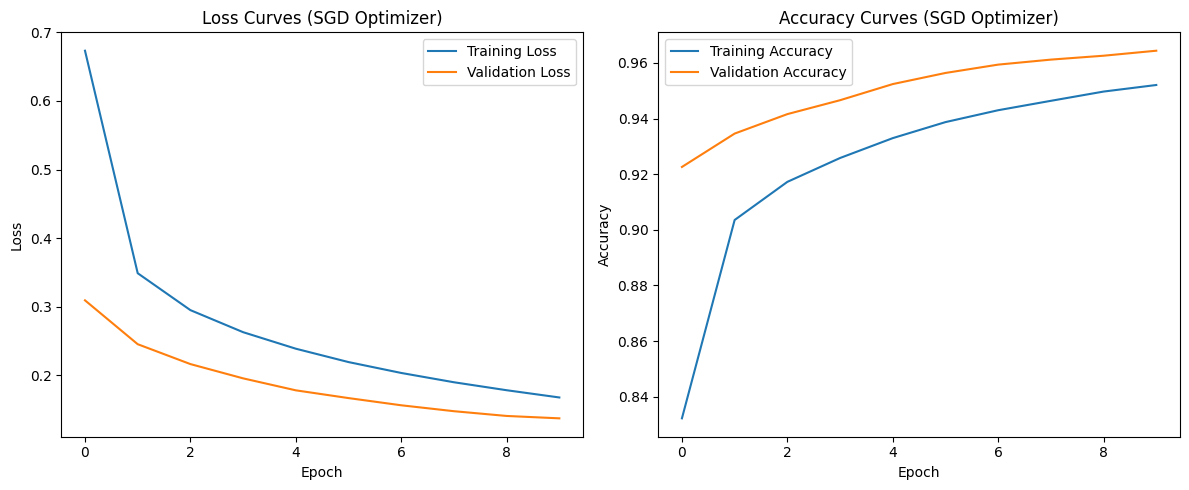

In [ ]:
# 1. Define a Keras Sequential model
model_sgd = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using SGD optimizer with learning_rate=0.01
model_sgd.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with SGD Optimizer...")
# 3. Train the model for 10 epochs
history_sgd = model_sgd.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (SGD Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_sgd.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (SGD Optimizer)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## SGD with Momentum Optimizer Experiment



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with SGD with Momentum Optimizer...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8441 - loss: 0.5203 - val_accuracy: 0.9636 - val_loss: 0.1402
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9524 - loss: 0.1638 - val_accuracy: 0.9722 - val_loss: 0.1036
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9682 - loss: 0.1087 - val_accuracy: 0.9728 - val_loss: 0.0936
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9744 - loss: 0.0850 - val_accuracy: 0.9762 - val_loss: 0.0808
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9807 - loss: 0.0692 - val_accuracy: 0.9792 - val_loss: 0.0700
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9845 - loss: 0.0550 - val_accuracy: 0.9786 - val_loss: 0.0703
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9865 - loss: 0.0478 - val_accuracy: 0.9786 - val_loss: 0.0730
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━

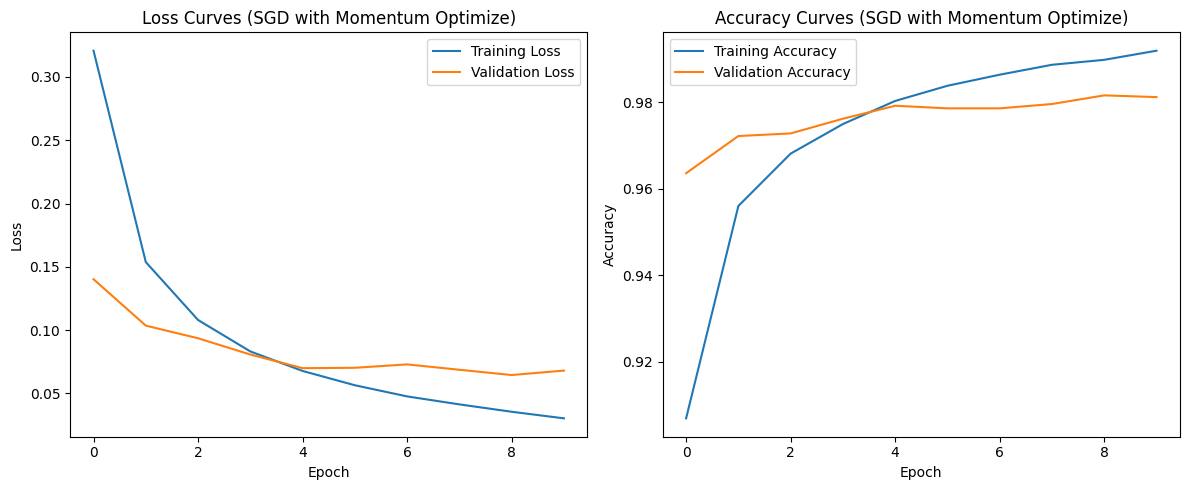

In [ ]:
# 1. Define a Keras Sequential model
model_sgd_mom = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using SGD with Momentum Optimizer Experiment
model_sgd_mom.compile(optimizer=keras.optimizers.SGD(momentum=0.9),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with SGD with Momentum Optimizer...")
# 3. Train the model for 10 epochs
history_sgd_mom = model_sgd_mom.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_sgd_mom.history['loss'], label='Training Loss')
plt.plot(history_sgd_mom.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (SGD with Momentum Optimize)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_sgd_mom.history['accuracy'], label='Training Accuracy')
plt.plot(history_sgd_mom.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (SGD with Momentum Optimize)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## Adam Optimizer Experiment



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with adam Optimizer ...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8728 - loss: 0.4485 - val_accuracy: 0.9700 - val_loss: 0.1134
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9629 - loss: 0.1283 - val_accuracy: 0.9752 - val_loss: 0.0905
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9748 - loss: 0.0833 - val_accuracy: 0.9766 - val_loss: 0.0796
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9816 - loss: 0.0605 - val_accuracy: 0.9754 - val_loss: 0.0831
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9877 - loss: 0.0433 - val_accuracy: 0.9792 - val_loss: 0.0771
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9886 - loss: 0.0354 - val_accuracy: 0.9774 - val_loss: 0.0792
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9922 - loss: 0.0277 - val_accuracy: 0.9802 - val_loss: 0.0776
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/st

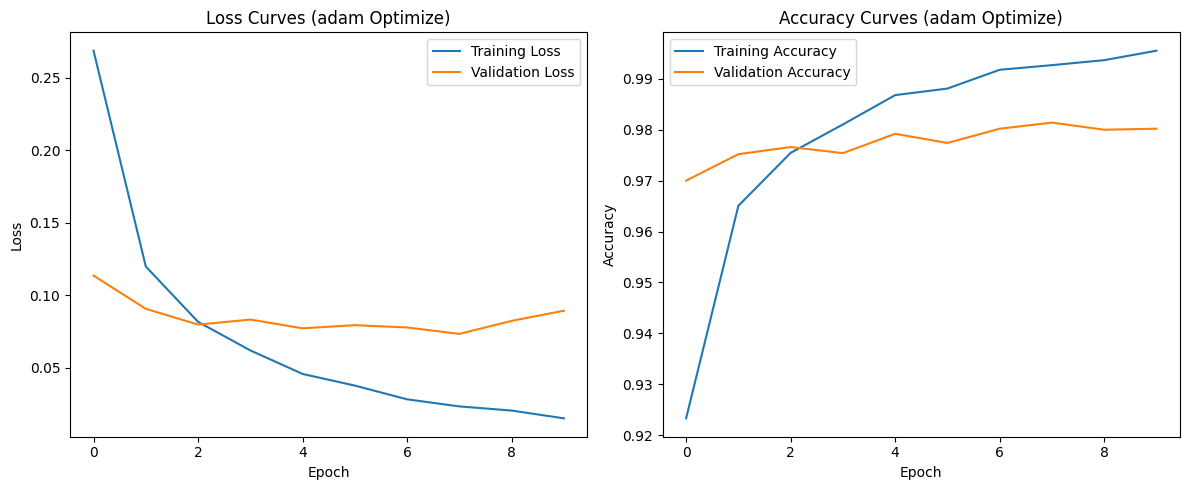

In [13]:
# 1. Define a Keras Sequential model
model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using adam Optimizer Experiment
model_adam.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with adam Optimizer ...")
# 3. Train the model for 10 epochs
history_model_adam = model_adam.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_adam.history['loss'], label='Training Loss')
plt.plot(history_model_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (adam Optimize)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (adam Optimize)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

## AdamW Optimizer Experiment



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with adamw Optimizer ...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8759 - loss: 0.4371 - val_accuracy: 0.9672 - val_loss: 0.1253
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9636 - loss: 0.1257 - val_accuracy: 0.9754 - val_loss: 0.0915
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9755 - loss: 0.0798 - val_accuracy: 0.9758 - val_loss: 0.0882
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9816 - loss: 0.0594 - val_accuracy: 0.9784 - val_loss: 0.0799
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9860 - loss: 0.0449 - val_accuracy: 0.9760 - val_loss: 0.0814
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9897 - loss: 0.0345 - val_accuracy: 0.9794 - val_loss: 0.0866
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9820 - val_loss: 0.0748
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/s

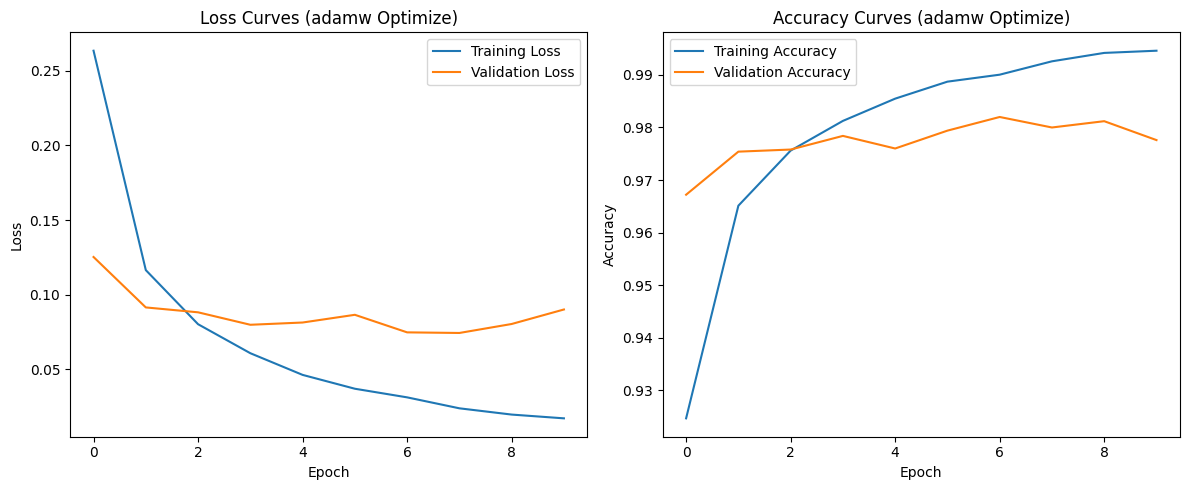

In [ ]:
# 1. Define a Keras Sequential model
model_adamw = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using adamw Optimizer Experiment
model_adamw.compile(optimizer="adamw",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with adamw Optimizer ...")
# 3. Train the model for 10 epochs
history_model_adamw = model_adamw.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_adamw.history['loss'], label='Training Loss')
plt.plot(history_model_adamw.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (adamw Optimize)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_adamw.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_adamw.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (adamw Optimize)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Task
### **Task 7 — Optimizer Comparison Challenge**

#### **1. Objective**
To compare the convergence speed and stability of SGD, SGD with Momentum, Adam, and AdamW optimizers, discuss how each navigates the loss landscape, and explain why adaptive optimizers like Adam often outperform classical methods.

#### **2. Code Used**
For each optimizer, a Keras Sequential model with `Flatten`, `Dense(128, activation="relu")`, and `Dense(10, activation="softmax")` layers was trained for 10 epochs. Each model was compiled with its respective optimizer configuration:

*   **SGD:** `keras.optimizers.SGD(learning_rate=0.01)`
*   **SGD with Momentum:** `keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)`
*   **Adam:** `keras.optimizers.Adam(learning_rate=0.001)` (default learning rate for Adam)
*   **AdamW:** `keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)` (default learning rate and a typical weight decay)

```python
# Example for SGD
model_sgd = keras.Sequential([...])
model_sgd.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), ...)
history_sgd = model_sgd.fit(x_tr, y_tr, epochs=10, validation_data=(x_val, y_val))
# Similar code structure for other optimizers.
```

#### **3. Results**

*   **SGD Optimizer:**
    <p align="center">
      <img src="inline_data_21" alt="Loss and Accuracy Curves (SGD)" width="700"/>
    </p>

*   **SGD with Momentum Optimizer:**
    <p align="center">
      <img src="inline_data_22" alt="Loss and Accuracy Curves (SGD with Momentum)" width="700"/>
    </p>

*   **Adam Optimizer:**
    <p align="center">
      <img src="inline_data_23" alt="Loss and Accuracy Curves (Adam)" width="700"/>
    </p>

*   **AdamW Optimizer:**
    <p align="center">
      <img src="inline_data_24" alt="Loss and Accuracy Curves (AdamW)" width="700"/>
    </p>

#### **4. Short Analysis**

**Convergence Speed and Stability:**

*   **SGD:** Showed the slowest convergence among all optimizers. Both training and validation loss decreased gradually, and accuracy increased steadily but slowly. The curves were relatively smooth, indicating stable but slow progress.
*   **SGD with Momentum:** Significantly faster convergence than plain SGD. The momentum term helped accelerate the learning process, leading to a quicker drop in loss and rise in accuracy. The curves were generally smoother than plain SGD, as momentum helps dampen oscillations.
*   **Adam:** Demonstrated the fastest convergence, reaching high accuracy and low loss within a few epochs. The curves show rapid initial improvement and then stable progress. It consistently achieved better performance metrics in fewer epochs compared to SGD variants.
*   **AdamW:** Similar to Adam, AdamW also showed fast convergence. Its performance was very close to Adam, often slightly outperforming in terms of validation loss/accuracy or showing better generalization in the long run due to its decoupled weight decay.

**How Each Optimizer Navigates the Loss Landscape:**

*   **SGD:** Takes small, consistent steps in the direction opposite to the gradient. In a complex, non-convex loss landscape, this can lead to slow progress through flat regions or getting stuck in local minima. Its steps are uniform across all dimensions, regardless of the steepness of the gradient in those dimensions.
*   **SGD with Momentum:** Introduces a "velocity" term that accumulates past gradients. This helps the optimizer build speed in consistent directions and "roll" over small obstacles (shallow local minima) in the loss landscape. It also smooths out oscillations in directions with high curvature, allowing for larger effective steps.
*   **Adam:** Combines the benefits of momentum and RMSprop. It computes adaptive learning rates for each parameter. It estimates both the first moment (mean) and the second moment (uncentered variance) of the gradients. This allows it to adapt the step size for each parameter individually, taking larger steps in dimensions with small, consistent gradients and smaller steps in dimensions with large or oscillating gradients. This adaptive nature makes it very efficient at navigating complex, high-dimensional loss landscapes, including those with saddle points or narrow valleys.
*   **AdamW:** A variant of Adam that decouples weight decay from the adaptive learning rate update. In original Adam, weight decay (L2 regularization) is mixed with the adaptive gradient scaling, which can sometimes lead to suboptimal results. AdamW applies weight decay directly to the weights, rather than through the gradients, often leading to better regularization and improved generalization, especially in larger models or when training for many epochs.

**Why Adam Often Outperforms Classical Optimizers:**
Adam (and its variants like AdamW) often outperforms classical optimizers like SGD and SGD with Momentum due to its adaptive learning rate mechanism.
1.  **Adaptive Learning Rates:** Adam dynamically adjusts the learning rate for each parameter. This means it can effectively handle sparse gradients (e.g., in NLP tasks or deep networks with ReLU activations) and noisy gradients, accelerating convergence significantly. Classical optimizers use a single learning rate for all parameters, making them sensitive to hyperparameter tuning and potentially slow in certain dimensions.
2.  **Robustness to Initial Conditions:** Adam is generally less sensitive to the initial choice of learning rate and other hyperparameters compared to SGD, making it easier to use out-of-the-box.
3.  **Efficiency:** It requires less memory and is computationally efficient, making it practical for large datasets and complex models.
4.  **Handling Sparse Gradients:** Its adaptive nature allows it to make significant progress even when gradients are sparse or very small, which is common in deep learning.

#### **5. Key Takeaway**
Adaptive optimizers like Adam and AdamW offer significant advantages in terms of convergence speed and robustness over classical optimizers (SGD, SGD with Momentum) by dynamically adjusting learning rates for each parameter, enabling more efficient navigation of complex loss landscapes and often leading to better performance and generalization with less hyperparameter tuning.

# **Task 8 — Batch Size & Gradient Noise Experiment**

Train the model with batch sizes:
8


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with 8 batch sizer ...
Epoch 1/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8954 - loss: 0.3537 - val_accuracy: 0.9638 - val_loss: 0.1225
Epoch 2/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9680 - loss: 0.1018 - val_accuracy: 0.9772 - val_loss: 0.0839
Epoch 3/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9796 - loss: 0.0669 - val_accuracy: 0.9738 - val_loss: 0.0912
Epoch 4/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9850 - loss: 0.0480 - val_accuracy: 0.9756 - val_loss: 0.0915
Epoch 5/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9877 - loss: 0.0365 - val_accuracy: 0.9762 - val_loss: 0.0932
Epoch 6/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9894 - loss: 0.0308 - val_accuracy: 0.9810 - val_loss: 0.0851
Epoch 7/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9925 - loss: 0.0239 - val_accuracy: 0.9796 - val_loss: 0.0912
Epoch 8/10
6875/6875 ━━━━━━━━━━━━━━━━━━━━ 27s

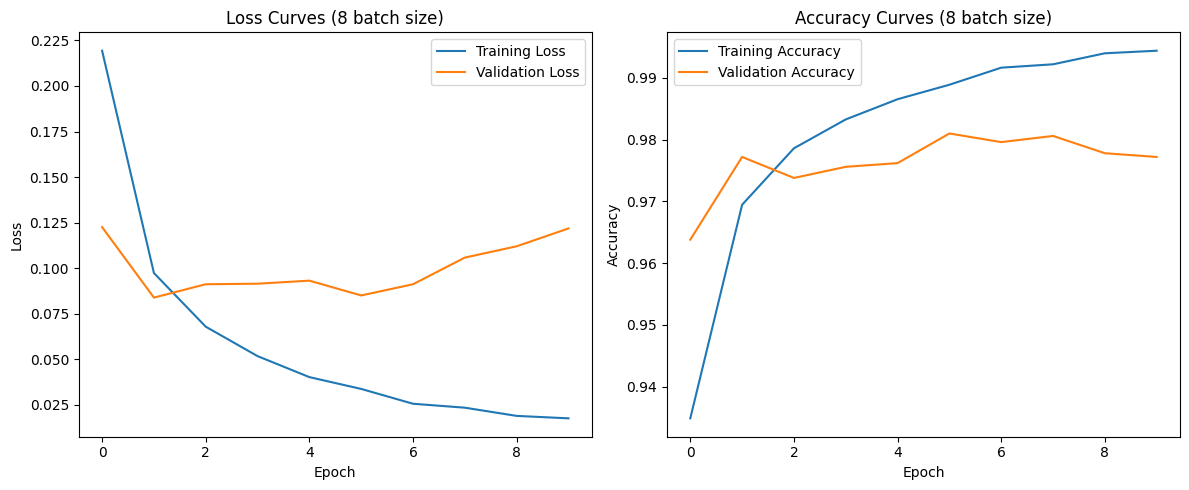

In [ ]:
# 1. Define a Keras Sequential model
model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using adam Optimizer Experiment
model_adam.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with 8 batch sizer ...")
# 3. Train the model for 8 batch size
history_model_adam = model_adam.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=8,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_adam.history['loss'], label='Training Loss')
plt.plot(history_model_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (8 batch size)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (8 batch size)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Task 8 — Batch Size & Gradient Noise Experiment**

Train the model with batch sizes: 32


Training model with 32 batch sizer ...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8738 - loss: 0.4516 - val_accuracy: 0.9684 - val_loss: 0.1205
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9613 - loss: 0.1289 - val_accuracy: 0.9762 - val_loss: 0.0907
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9748 - loss: 0.0856 - val_accuracy: 0.9710 - val_loss: 0.0991
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0593 - val_accuracy: 0.9770 - val_loss: 0.0829
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.9790 - val_loss: 0.0782
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9892 - loss: 0.0361 - val_accuracy: 0.9760 - val_loss: 0.0861
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9917 - loss: 0.0284 - val_accuracy: 0.9774 - val_loss: 0.0823
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/st

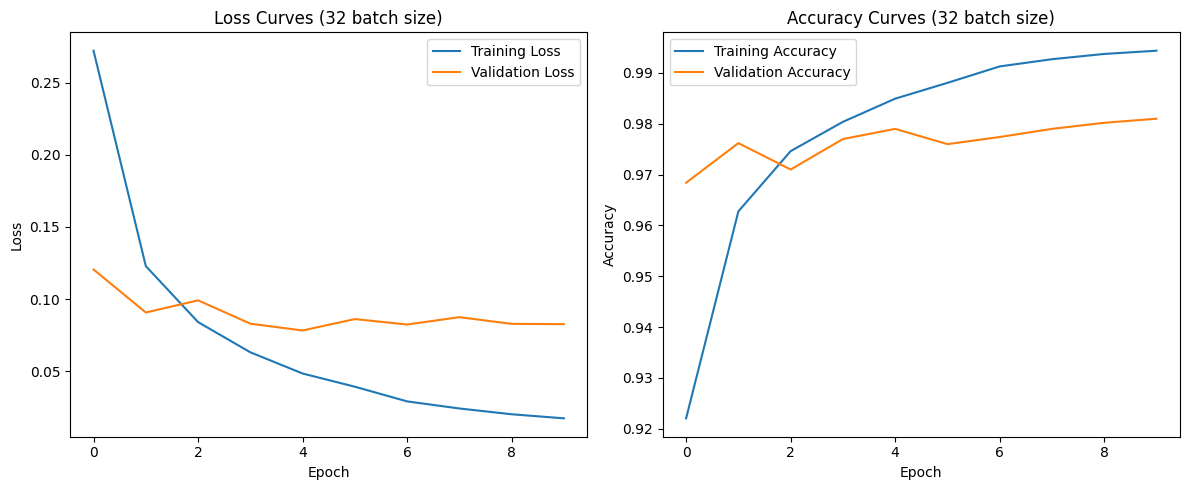

In [ ]:
# 1. Define a Keras Sequential model
model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using adam Optimizer Experiment
model_adam.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with 32 batch sizer ...")
# 3. Train the model for 32 batch size
history_model_adam = model_adam.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_adam.history['loss'], label='Training Loss')
plt.plot(history_model_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (32 batch size)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (32 batch size)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

**Task 8 — Batch Size & Gradient Noise Experiment**

Train the model with batch sizes: 128

Training model with 128 batch sizer ...
Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8179 - loss: 0.6503 - val_accuracy: 0.9546 - val_loss: 0.1691
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9465 - loss: 0.1869 - val_accuracy: 0.9664 - val_loss: 0.1207
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9630 - loss: 0.1343 - val_accuracy: 0.9734 - val_loss: 0.0964
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9723 - loss: 0.0991 - val_accuracy: 0.9762 - val_loss: 0.0860
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9771 - loss: 0.0811 - val_accuracy: 0.9762 - val_loss: 0.0819
Epoch 6/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9823 - loss: 0.0631 - val_accuracy: 0.9784 - val_loss: 0.0767
Epoch 7/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 0.0523 - val_accuracy: 0.9760 - val_loss: 0.0798
Epoch 8/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 

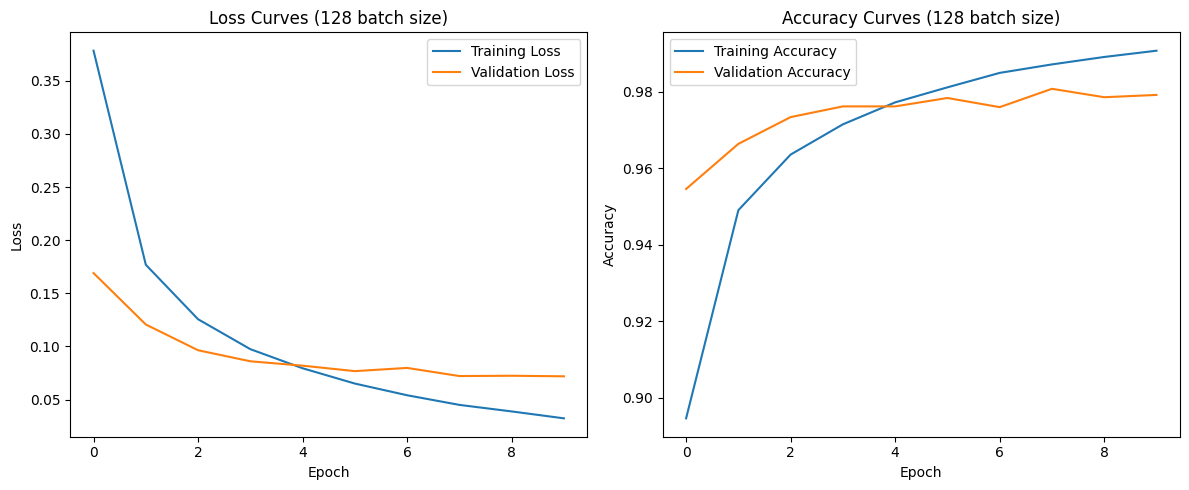

In [ ]:
# 1. Define a Keras Sequential model
model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model using adam Optimizer Experiment
model_adam.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with 128 batch sizer ...")
# 3. Train the model for 128 batch size
history_model_adam = model_adam.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_adam.history['loss'], label='Training Loss')
plt.plot(history_model_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (128 batch size)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (128 batch size)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Task 8 — Batch Size & Gradient Noise Experiment**

#### **1. Objective**
To investigate how different batch sizes (8, 32, 128) influence model training, specifically focusing on gradient noise, convergence speed, generalization, and the smoothness of learning curves.

#### **2. Code Used**
For each batch size, a Keras Sequential model with `Flatten`, `Dense(128, activation="relu")`, and `Dense(10, activation="softmax")` layers was trained for 10 epochs using the Adam optimizer.

```python
# Example for batch_size = 8
model_adam = keras.Sequential([...])
model_adam.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_model_adam = model_adam.fit(x_tr, y_tr, epochs=10, batch_size=8, validation_data=(x_val, y_val))
# Similar code structure for batch_size = 32 and 128.
```

#### **3. Results**

*   **Batch Size = 8:**
    <p align="center">
      <img src="inline_data_24" alt="Loss and Accuracy Curves (Batch Size 8)" width="700"/>
    </p>

*   **Batch Size = 32:**
    <p align="center">
      <img src="inline_data_25" alt="Loss and Accuracy Curves (Batch Size 32)" width="700"/>
    </p>

*   **Batch Size = 128:**
    <p align="center">
      <img src="inline_data_26" alt="Loss and Accuracy Curves (Batch Size 128)" width="700"/>
    </p>

#### **4. Short Analysis**

*   **Gradient Noise:** Smaller batch sizes (like 8) introduce more gradient noise, causing choppier loss curves. Larger batch sizes (like 128) have smoother curves due to less noise.
*   **Generalization:** Smaller batches (8, 32) can sometimes lead to better generalization by helping the model escape sharp local minima (due to noise). Larger batches (128) might converge to flatter, less optimal minima, potentially leading to worse generalization if trained for too long.
*   **Convergence Speed:** Larger batch sizes (128) often show faster progress per epoch because fewer updates are needed. However, smaller batches can achieve a good solution faster in terms of total training time, as each update is more frequent and diverse.
*   **Loss Curve Smoothness:** As batch size increases, the training and validation loss curves become noticeably smoother, as seen from batch 8 (noisy) to batch 128 (smoother).

#### **5. Key Takeaway**
Batch size significantly impacts training dynamics. Smaller batch sizes introduce more gradient noise which can aid in finding better generalizing solutions but lead to noisy loss curves. Larger batch sizes provide smoother training and faster per-epoch convergence but might settle for suboptimal solutions. A moderate batch size (like 32) often strikes a good balance.



### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:
- Tanh  




Training model with Tanh Activation function ...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8674 - loss: 0.4604 - val_accuracy: 0.9626 - val_loss: 0.1392
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9521 - loss: 0.1617 - val_accuracy: 0.9692 - val_loss: 0.1082
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.1022 - val_accuracy: 0.9744 - val_loss: 0.0873
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0719 - val_accuracy: 0.9760 - val_loss: 0.0800
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9846 - loss: 0.0543 - val_accuracy: 0.9774 - val_loss: 0.0813
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9890 - loss: 0.0405 - val_accuracy: 0.9790 - val_loss: 0.0704
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0287 - val_accuracy: 0.9802 - val_loss: 0.0694
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━

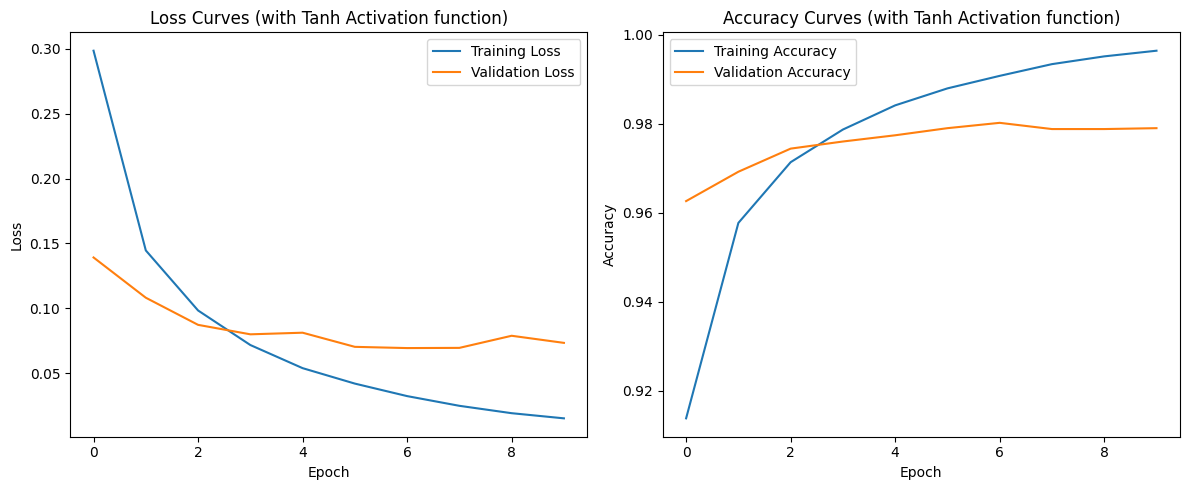

In [4]:
# 1. Define a Keras Sequential model
model_Tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model with Tanh Activation function
model_Tanh.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with Tanh Activation function ...")
# 3. Train the model with Tanh Activation function
history_model_Tanh = model_Tanh.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_Tanh.history['loss'], label='Training Loss')
plt.plot(history_model_Tanh.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (with Tanh Activation function)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_Tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_Tanh.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (with Tanh Activation function)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()



### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:

- Softsign  





Training model with softsign Activation function ...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8645 - loss: 0.4892 - val_accuracy: 0.9594 - val_loss: 0.1503
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9512 - loss: 0.1685 - val_accuracy: 0.9634 - val_loss: 0.1262
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9672 - loss: 0.1158 - val_accuracy: 0.9728 - val_loss: 0.0963
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9743 - loss: 0.0876 - val_accuracy: 0.9762 - val_loss: 0.0836
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9794 - loss: 0.0725 - val_accuracy: 0.9748 - val_loss: 0.0864
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9844 - loss: 0.0557 - val_accuracy: 0.9758 - val_loss: 0.0765
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0457 - val_accuracy: 0.9776 - val_loss: 0.0773
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━

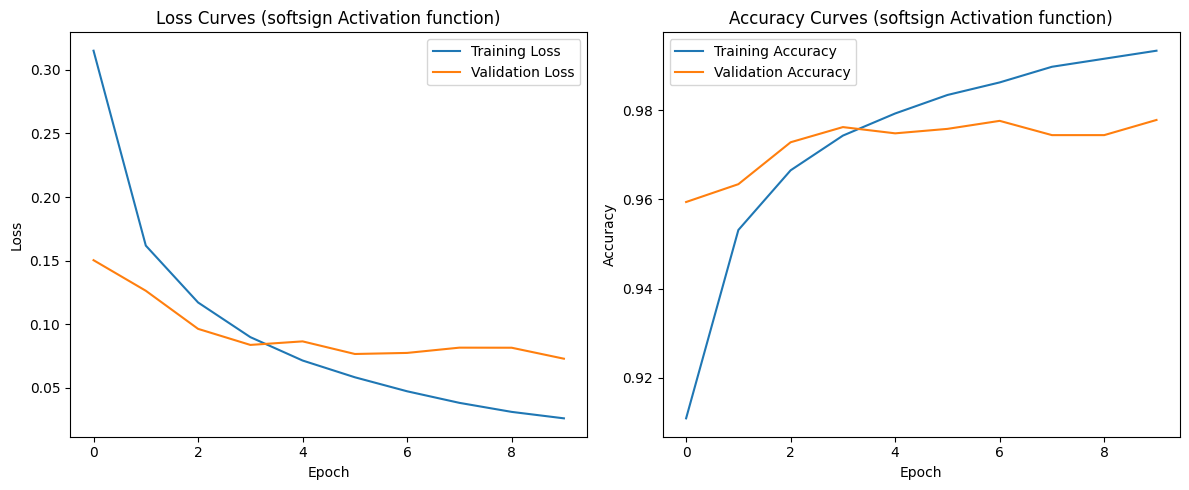

In [7]:
# 1. Define a Keras Sequential model
model_softsign = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="softsign"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model with softsign Activation function
model_softsign.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with softsign Activation function ...")
# 3. Train the model with Tanh Activation function
history_model_softsign = model_softsign.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_softsign.history['loss'], label='Training Loss')
plt.plot(history_model_softsign.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (softsign Activation function)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_softsign.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_softsign.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (softsign Activation function)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()



### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**
Modify the model by replacing ReLU with:
- GELU




/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with GELU Activation function ...
Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8733 - loss: 0.4465 - val_accuracy: 0.9696 - val_loss: 0.1137
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9628 - loss: 0.1255 - val_accuracy: 0.9742 - val_loss: 0.0929
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0813 - val_accuracy: 0.9774 - val_loss: 0.0762
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9827 - loss: 0.0559 - val_accuracy: 0.9784 - val_loss: 0.0761
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9808 - val_loss: 0.0750
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9913 - loss: 0.0299 - val_accuracy: 0.9802 - val_loss: 0.0674
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9926 - loss: 0.0243 - val_accuracy: 0.9812 - val_loss: 0.0742
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━

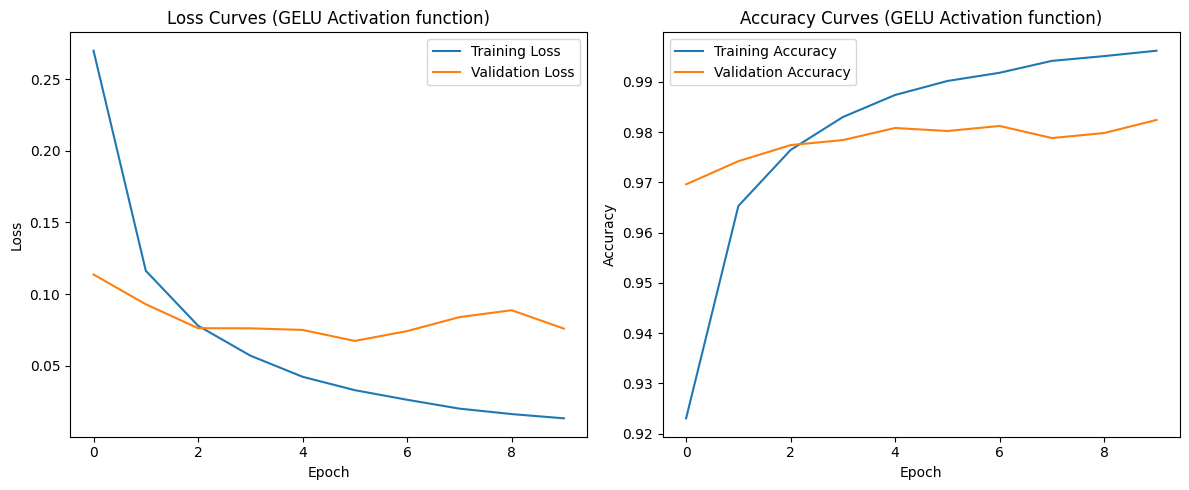

In [9]:
# 1. Define a Keras Sequential model
model_GELU = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="gelu"),
    keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model with GELU Activation function
model_GELU.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

print("Training model with GELU Activation function ...")
# 3. Train the model with GELU Activation function
history_model_GELU = model_GELU.fit(
    x_tr, y_tr,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

# 4. Plot training vs. validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_model_GELU.history['loss'], label='Training Loss')
plt.plot(history_model_GELU.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves (GELU Activation function)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training vs. validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_model_GELU.history['accuracy'], label='Training Accuracy')
plt.plot(history_model_GELU.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves (GELU Activation function)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### **Task 9 — Activation Function Swap (ReLU vs Tanh vs GELU)**

#### **1. Objective**
To analyze how different activation functions (Tanh, Softsign, and GELU, compared to the default ReLU) affect the model's performance, gradient flow, and identify scenarios where specific activations are more advantageous.

#### **2. Code Used**
For each activation function, a Keras Sequential model with `Flatten`, `Dense(128, activation="[ACTIVATION_FUNCTION]")`, and `Dense(10, activation="softmax")` layers was trained for 10 epochs using the Adam optimizer. The activation function string was replaced accordingly (`"tanh"`, `"softsign"`, `"gelu"`).

```python
# Example for Tanh
model_Tanh = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
model_Tanh.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_model_Tanh = model_Tanh.fit(x_tr, y_tr, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Similar code structure for Softsign and GELU.
```

#### **3. Results**

*   **Tanh Activation:**
    <p align="center">
      <img src="inline_data_27" alt="Loss and Accuracy Curves (with Tanh Activation function)" width="700"/>
    </p>

*   **Softsign Activation:**
    <p align="center">
      <img src="inline_data_28" alt="Loss and Accuracy Curves (softsign Activation function)" width="700"/>
    </p>

*   **GELU Activation:**
    <p align="center">
      <img src="inline_data_29" alt="Loss and Accuracy Curves (GELU Activation function)" width="700"/>
    </p>

#### **4. Short Analysis**

*   **How each activation affects gradient flow:**
    *   **Tanh (Hyperbolic Tangent):** This activation function outputs values between -1 and 1. It is a zero-centered function, which can help in accelerating convergence compared to sigmoid, as gradients are less likely to oscillate. However, like sigmoid, it still suffers from the vanishing gradient problem for very large or very small inputs, where the gradient approaches zero, slowing down learning.
    *   **Softsign:** Similar to Tanh, Softsign is also S-shaped and outputs values between -1 and 1. It is defined as `x / (1 + abs(x))`. Its derivative is `1 / (1 + abs(x))^2`, which decays polynomially rather than exponentially like Tanh. This means its gradients vanish slower than Tanh, potentially allowing for better gradient flow in very deep networks compared to Tanh, though still slower than ReLU for positive values.
    *   **GELU (Gaussian Error Linear Unit):** This is a non-monotonic activation function that combines properties of ReLU and dropout. It smooths out ReLU and is defined as `x * Φ(x)`, where `Φ(x)` is the cumulative distribution function of the standard Gaussian distribution. GELU effectively acts as a ReLU with a 'probabilistic' switch, where the probability of activation depends on the input value. Its non-monotonic nature and smoother derivative help in addressing vanishing gradients and lead to more stable training.

*   **Which activations risk vanishing gradients:**
    *   Both **Tanh** and **Softsign** risk vanishing gradients, especially for inputs far from zero. Tanh's gradients vanish faster due to its exponential decay. Softsign's polynomial decay makes it slightly more resistant but still susceptible.
    *   **ReLU** (which was the default in previous tasks) mitigates the vanishing gradient problem for positive inputs by having a constant gradient of 1. For negative inputs, the gradient is 0, leading to the

### **Task 10 — Weight Inspection & Model Capacity Analysis**
Extract weights from the first Dense layer:
```python
w, b = model.layers[1].get_weights()
print(w.shape)
```
Reflect on:
- Why the number of parameters is so large.  
- How high model capacity increases overfitting risk.  
- How techniques like Dropout, L2, and EarlyStopping each mitigate this risk differently.

---


In [12]:
# Assuming model_GELU from the previous task is the relevant model
# The architecture is typically: Flatten -> Dense(128) -> Dense(10)

# Access the first Dense layer (index 1) which has 128 units
first_dense_layer = model_GELU.layers[1]

# Extract the kernel weights (w) and bias (b) from this layer
w, b = first_dense_layer.get_weights()

# Print the shape of the kernel weights
print("Shape of kernel weights (w) from the first Dense layer:", w.shape)
print("Shape of bias (b) from the first Dense layer:", b.shape)

Shape of kernel weights (w) from the first Dense layer: (784, 128)
Shape of bias (b) from the first Dense layer: (128,)


### **Task 10 — Weight Inspection & Model Capacity Analysis**

#### **1. Objective**
To analyze the implications of the number of parameters in the first Dense layer on model capacity and overfitting, and to explain how various regularization techniques (Dropout, L2, EarlyStopping) mitigate this risk.

#### **2. Code Used**
```python
# Extraction of weights from the first Dense layer of model_GELU
first_dense_layer = model_GELU.layers[1]
w, b = first_dense_layer.get_weights()

print("Shape of kernel weights (w) from the first Dense layer:", w.shape)
print("Shape of bias (b) from the first Dense layer:", b.shape)
```

#### **3. Results**
*   Shape of kernel weights (w) from the first Dense layer: `(784, 128)`
*   Shape of bias (b) from the first Dense layer: `(128,)`

#### **4. Short Analysis**

*   **Why the number of parameters is so large:**
    The input images are 28x28 pixels. When flattened, this becomes a vector of 784 features. The first Dense layer has 128 neurons. Therefore, each of the 128 neurons connects to all 784 input features. This results in `784 * 128 = 100,352` weights for the connections (kernel weights). Additionally, each of the 128 neurons has its own bias term, adding `128` bias parameters. In total, this single layer has `100,352 + 128 = 100,480` parameters. This number is considered large for a single hidden layer in a simple neural network, indicating high model capacity.

*   **How high model capacity increases overfitting risk:**
    High model capacity means the model has a very large number of parameters relative to the size and complexity of the training data. Such models have many degrees of freedom and can easily 'memorize' the training data, including noise and irrelevant patterns, rather than learning generalizable features. When a model memorizes the training data, its performance on that data will be excellent (low training loss, high training accuracy), but it will struggle to perform well on new, unseen data (high validation loss, low validation accuracy), which is the definition of overfitting.

*   **How techniques like Dropout, L2, and EarlyStopping each mitigate this risk differently:**
    *   **Dropout:** Acts by randomly deactivating a fraction of neurons during each training step. This forces the network to learn more robust features that are not overly reliant on any single neuron or specific set of co-adapting neurons. It effectively trains an ensemble of smaller networks, reducing the inter-dependency of neurons and improving generalization.
    *   **L2 Regularization (Weight Decay):** Adds a penalty to the loss function proportional to the square of the magnitude of the weights. This encourages the model to use smaller weights, making the decision boundary smoother and less sensitive to individual data points. Smaller weights reduce the complexity of the model, thus making it less prone to memorizing the training data's noise.
    *   **EarlyStopping:** This is a meta-regularization technique that monitors the model's performance on a validation set during training. It stops the training process once the validation performance (e.g., validation loss) stops improving for a specified number of epochs (patience). This prevents the model from continuing to train past the point where it starts to overfit, saving the weights from the epoch with the best validation performance. It's an efficient way to prevent models from learning the noise in the training data.

#### **5. Key Takeaway**
The large number of parameters in a neural network contributes to high model capacity, increasing the risk of overfitting. Regularization techniques like Dropout, L2 regularization, and EarlyStopping are crucial tools that combat overfitting by either simplifying the model (L2), making it more robust (Dropout), or halting training before performance degrades on unseen data (EarlyStopping).